# Graphing data
Graphing different things within the data

In [122]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import glob
import global_settings as gs
import pickle
import astropy.stats
from importlib import reload
reload(gs)

os.getcwd()
output_location = 'G:/honours/outputs'

## 1. Plotting NMAD v Template

In [182]:
test_directories_list = [f'{output_location}/cdfs/individual_main/individual_main_data.csv',
                         f'{output_location}/cdfs/individual/individual_data.csv',
                         f'{output_location}/cdfs/individual_main_0.05/individual_main_0.05_data.csv',
                         f'{output_location}/cdfs/individual_lacy_0.05/individual_lacy_0.05_data.csv',
                         f'{output_location}/cdfs/individual_lacy_0.05_obs/individual_lacy_0.05_obs_data.csv',
                         f'{output_location}/cdfs/individual_main_agn_above_0.1/individual_main_agn_above_0.1_data.csv',
                         f'{output_location}/cdfs/individual_only_agn_0.4/individual_only_agn_0.4_data.csv',
                         f'{output_location}/cdfs/individual_only_agn_0.4_obs/individual_only_agn_0.4_obs_data.csv',
                         f'{output_location}/cdfs/individual_lacy2_0.05/individual_lacy2_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.0to0.1_0.05/individual_bin0.0to0.1_0.05_data.csv',
                         f'{output_location}/cdfs/individual_donley_all_0.05/individual_donley_all_0.05_data.csv',
                         f'{output_location}/combined/individual_combined_0.05_2/individual_combined_0.05_2_data.csv'] # List of all the test directories with NMAD values to load, should each contain the same no. of templates

test_name_list = ['individual_rest', 'individual_obs', 'individual_main_0.05', 'individual_lacy_0.05', 'individual_lacy_0.05_obs', 'individual_main_agn_above_0.1', 'individual_only_agn_0.4', 'individual_only_agn_0.4_obs', 'individual_lacy2_0.05', 'bin0.0to0.1_0.05', 'donley_all_0.05', 'individual_combined_0.05_2'] # List of names for each test directory

no_template_nmad_list = [0.013429984, 0.013429984, 0.019863030992036, 0.0323514264448324, 0.0323514264448324, 0.0287771466353268, 0.0555815201454613, 0.0555815201454613, 0.03155071491144223, 0.01800493236298936, 0.049616638403152315, 0.019378955261875105] # List of NMAD values without templates for each test directory

nmad_df = pd.DataFrame()
nmad_df['template_order'] = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

for test_name in range(len(test_directories_list)):
    total_df = pd.read_csv(test_directories_list[test_name])
    nmad_df[test_name_list[test_name]] = total_df['nmad_val'] - no_template_nmad_list[test_name]
    print(f'Reductive Templates in {test_name_list[test_name]}: \n{nmad_df[nmad_df[test_name_list[test_name]] < 0.0]}')

Reductive Templates in individual_rest: 
    template_order  individual_rest
11              34        -0.000035
Reductive Templates in individual_obs: 
    template_order  individual_rest  individual_obs
5               15         0.000991       -0.000675
9                6         0.001259       -0.000550
14              35         0.000311       -0.000207
21              16         0.001566       -0.000034
37              12         0.001027       -0.000370
Reductive Templates in individual_main_0.05: 
Empty DataFrame
Columns: [template_order, individual_rest, individual_obs, individual_main_0.05]
Index: []
Reductive Templates in individual_lacy_0.05: 
    template_order  individual_rest  individual_obs  individual_main_0.05  \
1                1         0.001124        0.000034              0.002084   
8                8         0.001192        0.001028              0.002010   
9                6         0.001259       -0.000550              0.001723   
11              34        -0

In [183]:
nmad_plot = nmad_df.sort_values('template_order')
nmad_set = set(no_template_nmad_list) # Gets how many catalogues are present
len(nmad_plot.columns)

13

In [184]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(nmad_set), figsize=(6, len(nmad_set)), sharex=True)

for i in range(len(nmad_set)):
    for col in range(len(nmad_plot.columns) - 1):
        col2 = col
        col += 1 # Skip the first column as it is the template order
        if no_template_nmad_list[col2] == list(nmad_set)[i]:
            axes[i].plot(nmad_plot['template_order'], nmad_plot.iloc[:,col], label = test_name_list[col2])
    axes[i].plot(nmad_plot['template_order'], np.zeros(len(nmad_plot['template_order'])), label = 'No AGN Template', linestyle = '--', c='k')
    axes[i].legend(bbox_to_anchor=(1.02, 0, 1,1), loc="center left", mode="expand", borderaxespad=0, ncol=1)

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Template Order, Bluest to Reddest')
plt.ylabel('NMAD - NMAD without templates', labelpad=20)


Text(40.347222222222214, 0.5, 'NMAD - NMAD without templates')

Error in callback <function flush_figures at 0x000001E85B9C6A70> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Same Graph with only AGN Bins

In [185]:
test_directories_list = [f'{output_location}/cdfs/individual_bin0.0to0.1_0.05/individual_bin0.0to0.1_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.1to0.2_0.05/individual_bin0.1to0.2_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.2to0.3_0.05/individual_bin0.2to0.3_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.3to0.4_0.05/individual_bin0.3to0.4_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.4to0.5_0.05/individual_bin0.4to0.5_0.05_data.csv',
                         f'{output_location}/cdfs/individual_only_agn_0.5_0.05/individual_only_agn_0.5_0.05_data.csv'] # List of all the test directories with NMAD values to load, should each contain the same no. of templates

test_name_list = ['individual_bin0.0to0.1', 'individual_bin0.1to0.2', 'individual_bin0.2to0.3', 'individual_bin0.3to0.4', 'individual_bin0.4to0.5', 'individual_only_agn_0.5'] # List of names for each test directory

no_template_nmad_list = [0.018004958, 0.018259684, 0.0254315565614942, 0.0359537225669563, 0.0249133578745259, 0.142984052745047] # List of NMAD values without templates for each test directory

nmad_df = pd.DataFrame()
nmad_df['template_order'] = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

for test_name in range(len(test_directories_list)):
    total_df = pd.read_csv(test_directories_list[test_name])
    nmad_df[test_name_list[test_name]] = total_df['nmad_val'] - no_template_nmad_list[test_name]
    print(f'Reductive Templates in {test_name_list[test_name]}: \n{nmad_df[nmad_df[test_name_list[test_name]] < 0.0]}')

Reductive Templates in individual_bin0.0to0.1: 
Empty DataFrame
Columns: [template_order, individual_bin0.0to0.1]
Index: []
Reductive Templates in individual_bin0.1to0.2: 
    template_order  individual_bin0.0to0.1  individual_bin0.1to0.2
7               39                0.000619               -0.000139
10              41                0.000765               -0.000042
Reductive Templates in individual_bin0.2to0.3: 
    template_order  individual_bin0.0to0.1  individual_bin0.1to0.2  \
0               40                0.000593                0.000409   
7               39                0.000619               -0.000139   
10              41                0.000765               -0.000042   
14              35                0.000966                0.000186   
25              14                0.001142                0.003885   
26              33                0.001199                0.002568   
38              37                0.000584                0.000759   

    individual_bin

Text(40.347222222222214, 0.5, 'NMAD - NMAD without templates')

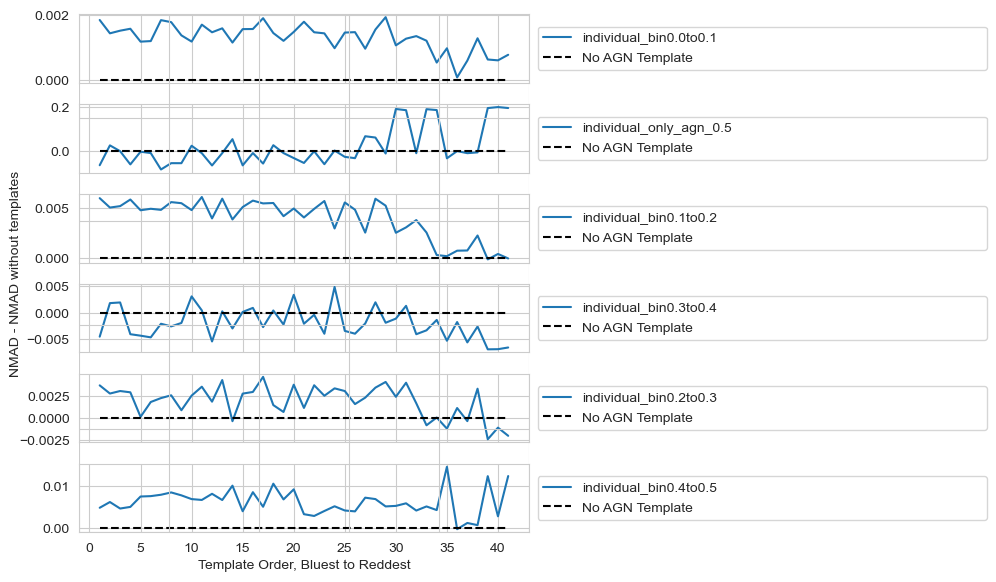

In [186]:
nmad_plot = nmad_df.sort_values('template_order')
nmad_set = set(no_template_nmad_list) # Gets how many catalogues are present

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(nmad_set), figsize=(6, len(nmad_set)), sharex=True)

for i in range(len(nmad_set)):
    for col in range(len(nmad_plot.columns) - 1):
        col2 = col
        col += 1 # Skip the first column as it is the template order
        if no_template_nmad_list[col2] == list(nmad_set)[i]:
            axes[i].plot(nmad_plot['template_order'], nmad_plot.iloc[:,col], label = test_name_list[col2])
    axes[i].plot(nmad_plot['template_order'], np.zeros(len(nmad_plot['template_order'])), label = 'No AGN Template', linestyle = '--', c='k')
    axes[i].legend(bbox_to_anchor=(1.02, 0, 1,1), loc="center left", mode="expand", borderaxespad=0, ncol=1)

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Template Order, Bluest to Reddest')
plt.ylabel('NMAD - NMAD without templates', labelpad=20)

Same Graph with each field

In [187]:
test_directories_list = [f'{output_location}/cdfs/individual_donley_main_0.05/individual_donley_main_0.05_data.csv',
                         f'{output_location}/cosmos/individual_donley_main_0.05/individual_donley_main_0.05_data.csv',
                         f'{output_location}/uds/individual_donley_main_0.05/individual_donley_main_0.05_data.csv'] # List of all the test directories with NMAD values to load, should each contain the same no. of templates

test_name_list = ['cdfs', 'cosmos', 'uds'] # List of names for each test directory

no_template_nmad_list = [0.0500409075913965,0.0181856141740006,0.01547076554904] # List of NMAD values without templates for each test directory

nmad_df = pd.DataFrame()
nmad_df['template_order'] = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

for test_name in range(len(test_directories_list)):
    total_df = pd.read_csv(test_directories_list[test_name])
    nmad_df[test_name_list[test_name]] = total_df['nmad_val'] - no_template_nmad_list[test_name]
    print(f'Reductive Templates in {test_name_list[test_name]}: \n{nmad_df[nmad_df[test_name_list[test_name]] < -0.05 * no_template_nmad_list[test_name]]}')

Reductive Templates in cdfs: 
    template_order      cdfs
1                1 -0.021017
2                7 -0.019622
5               15 -0.020621
9                6 -0.003147
10              41 -0.015870
12               2 -0.020108
13              21 -0.003768
15              22 -0.007067
16              23 -0.006780
19               9 -0.008157
21              16 -0.005364
22              11 -0.004835
23              19 -0.006741
27               5 -0.009662
30              26 -0.004022
32              10 -0.008061
33               4 -0.020893
34              20 -0.005072
35               3 -0.011614
36              29 -0.006494
37              12 -0.021151
38              37 -0.004281
39              13 -0.010466
Reductive Templates in cosmos: 
Empty DataFrame
Columns: [template_order, cdfs, cosmos]
Index: []
Reductive Templates in uds: 
Empty DataFrame
Columns: [template_order, cdfs, cosmos, uds]
Index: []


Text(40.347222222222214, 0.5, 'NMAD - NMAD without templates')

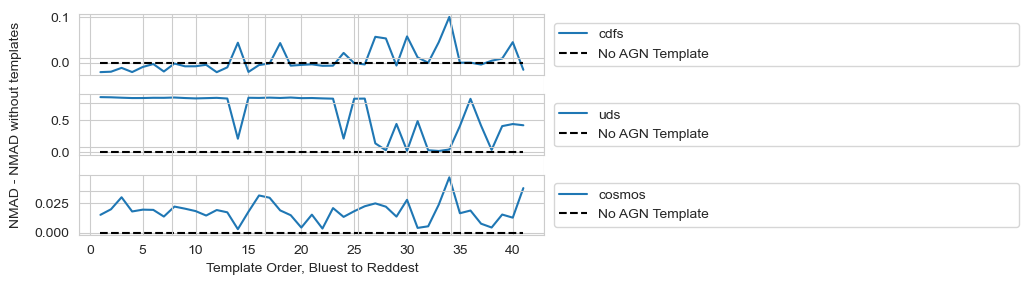

In [188]:
nmad_plot = nmad_df.sort_values('template_order')
nmad_set = set(no_template_nmad_list) # Gets how many catalogues are present

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(nmad_set), figsize=(6, len(nmad_set)), sharex=True)

for i in range(len(nmad_set)):
    for col in range(len(nmad_plot.columns) - 1):
        col2 = col
        col += 1 # Skip the first column as it is the template order
        if no_template_nmad_list[col2] == list(nmad_set)[i]:
            axes[i].plot(nmad_plot['template_order'], nmad_plot.iloc[:,col], label = test_name_list[col2])
    axes[i].plot(nmad_plot['template_order'], np.zeros(len(nmad_plot['template_order'])), label = 'No AGN Template', linestyle = '--', c='k')
    axes[i].legend(bbox_to_anchor=(1.02, 0, 1,1), loc="center left", mode="expand", borderaxespad=0, ncol=1)

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Template Order, Bluest to Reddest')
plt.ylabel('NMAD - NMAD without templates', labelpad=20)

## 2. Plotting with the residuals from a Single Loop Test

In [66]:
os.getcwd()
test_title = 'individual_uds_donley_0.05_True' # title of the test, eg. 1,2, A, B, Initial.
field = 'uds'
id_key = 'donley' # normal, high or low
use_galaxy_templates = True
params = {}
params["Z_STEP"] = 0.05
params['TEMPLATE_COMBOS'] = 'a'
output_location = 'G:/honours/outputs'

#opening data keys
id_key_dict = gs.get_id_dict(field)
template_key = 'atlas_rest'
template_key_dict = gs.get_template_dict()
agn_dir =  template_key_dict[template_key] # dir with all agn templates
agn_temp_all = os.listdir(agn_dir)


#Setting up the main catalogue
main_cat = pd.read_csv(id_key_dict[id_key]) # get the catalogue for the id_key
main_cat.to_csv('inputs/eazy_reload.cat', index=False) # create a new catalogue, allows for change to be made in this cell

main = pd.read_csv('inputs/eazy_reload.cat', sep=" ", comment="#", header=None, skipinitialspace=True) # opening cut cat, and adjusting it
headers = pd.read_csv('inputs/eazy_reload.cat', sep=" ", header=None, nrows=1).iloc[0]
headers = headers[1:]
main.columns = headers
agn_per_dir = f'inputs/{field}_agn_frac.txt' # file with AGN fractions for each object, prepared in catalogue_prepare.ipynb
all_bayes = pd.read_csv(agn_per_dir, sep="\s+", comment='#')

has_fraction = 'bayes.agn.fracAGN' in main.columns
if not has_fraction:
    main = pd.merge(main, all_bayes, on='id', how='left') # AGN fraction for each object


In [67]:
#check_df = pd.read_csv(f'{output_location}/{field}/{test_title}/induvidual_data_{field}_{id_key}_{params["Z_STEP"]}_[0]_{use_galaxy_templates}.csv')
check_df = gs.load_individual(output_location, field, test_title, id_key, template_key, [0], use_galaxy_templates, params["Z_STEP"], params['TEMPLATE_COMBOS'])
if len(main) != len(check_df):
    print('Lengths of the main catalog and the test catalog do not match')
    print(f'Main: {len(main)}, Test: {len(check_df)}')
    print('The next cell will not work as intended')
else:
    print('Lengths of the main catalog and the test catalog match')

Lengths of the main catalog and the test catalog match


C:\Users\eddie\AppData\Local\Temp\ipykernel_27868\1158668939.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy() This was a warning, to be fixed later

In [68]:
residual_df = pd.DataFrame()
for template in range(len(agn_temp_all)):
    agn_sed = [template]

    individual_df = gs.load_individual(output_location, field, test_title, id_key, template_key, agn_sed, use_galaxy_templates, params["Z_STEP"], params['TEMPLATE_COMBOS'])

    self = gs.load_self(main, output_location, field, test_title, id_key, template_key, agn_sed, use_galaxy_templates, params["Z_STEP"], params['TEMPLATE_COMBOS'])

    #limit the no of objects to those that are present in all bands, and have a positive redshift
    flux_observed = []
    flux_residual_objects = []

    # Filter section
    filter_attendance = 39 # can miss 1 filter and still be selected
    for i in range(len(self.fnu)):
        if self.ZSPEC[i] < 0.001:
            continue
        if sum(self.fnu[i] <= 0) > filter_attendance:
            continue # don't use objects where more than filter attendance filters are missing (eg. if one filter_attendance is 1, if one filter is missing it still goes forward, if two are missing it doesn't)
        else:
            flux_observed.append(self.fnu[i])
            flux_residual_objects.append(i)
    flux_observed = np.array(flux_observed)

    #find the residuals of the objects
    flux_model = self.fmodel[flux_residual_objects]
    error_observed = self.efnu[flux_residual_objects]
    flux_residual = np.zeros_like(flux_observed)
    residual_uncertainties = []
    for row in range(len(flux_residual_objects)):
        residual_uncertainties.append(error_observed[row] / flux_observed[row])
        for col in range(flux_observed.shape[1]): #no. of bands
            if flux_observed[row,col] == -99: # if the flux is -99, it is not recorded and should not be shown as such
                flux_residual[row, col] = math.nan
            elif flux_model[row,col] == 0: # some models have no flux, this means they will be removed later
                flux_residual[row, col] = math.nan
            else:
                flux_residual[row,col] = (flux_observed[row,col] - flux_model[row,col]) / flux_observed[row,col]

    #flux_residual = flux_residual[~np.isnan(flux_residual).any(axis=1)] # remove nan values
    residual_uncertainties = np.array(residual_uncertainties)

    #redshift the objects
    object_redshifted = []
    pivots = self.pivot
    for i in range(len(flux_residual_objects)):
        im = flux_residual_objects[i]
        redshifted = pivots / (1 + self.ZSPEC[im])
        object_redshifted.append(redshifted)
    object_redshifted = np.array(object_redshifted)

    #plot the residuals
    wavelength_flat = object_redshifted.flatten()
    residual_flat = flux_residual.flatten()
    uncertainties_flat = residual_uncertainties.flatten()

    #binning
    obj_per_bin = round(0.5 * sum(self.ZSPEC > 0.001)) #EAZY used 2000
    res_sorted = pd.DataFrame({'wavelength':wavelength_flat, 'residual':residual_flat, 'uncertainties':uncertainties_flat})
    res_sorted = res_sorted.sort_values(by='wavelength')
    res_sorted = res_sorted.dropna(how='any') # remove nan
    res_std = np.std(res_sorted['residual'])
    res_sorted = res_sorted[abs(res_sorted['residual']) < 3 * res_std] # remove 3sig outliers
    no_of_bins_res = np.ceil(len(res_sorted) // obj_per_bin)
    res_sorted = res_sorted.reset_index(drop=True)
    res_sorted_copy = res_sorted # not abs
    res_sorted = abs(res_sorted)
    res_bin = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", "Confidence"])
    res_bin_copy = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", 'Confidence'])
    for i in range(int(no_of_bins_res)):
        min_loop = i * obj_per_bin
        max_loop = ((i+1) * obj_per_bin)
        med_res = np.median(res_sorted['residual'][min_loop:max_loop])
        med_res_copy = np.median(res_sorted_copy['residual'][min_loop:max_loop]) # only the residuals should be affected by abs
        med_wave = np.median(res_sorted['wavelength'][min_loop:max_loop])
        med_unc = np.median(res_sorted['uncertainties'][min_loop:max_loop])
        confidence =  (50/68.2) * 1.2533 * (np.std(res_sorted_copy['residual'][min_loop:max_loop])/np.sqrt(obj_per_bin)) # want 50% confidence interval from standard error of the median
        res_bin.loc[i] = [med_res, med_wave, med_unc, confidence]
        res_bin_copy.loc[i] = [med_res_copy, med_wave, med_unc, confidence] # copy is not abs, used in plot with negative values

    residual_df[f'r_{template}'] = res_bin['Median Residuals']
    residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
    residual_df[f'w_{template}'] = res_bin['Median Wavelength']
    residual_df[f'c_{template}'] = res_bin['Confidence']

C:\Users\eddie\AppData\Local\Temp\ipykernel_12976\1685648141.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_12976\1685648141.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_12976\1685648141.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

In [69]:
# residual for no agn template
individual_df = gs.load_individual(output_location, field, 'test_8', id_key, template_key, [], use_galaxy_templates, params["Z_STEP"], params['TEMPLATE_COMBOS']) # Run the test in EAZY_test.py with no AGN templates before starting this

self = gs.load_self(main, output_location, field, 'test_8', id_key, template_key, [], use_galaxy_templates, params["Z_STEP"], params['TEMPLATE_COMBOS'])

#limit the no of objects to those that are present in all bands, and have a positive redshift
flux_observed = []
flux_residual_objects = []

# Filter section
filter_attendance = 39 # can miss 1 filter and still be selected
for i in range(len(self.fnu)):
    if self.ZSPEC[i] < 0.001:
        continue
    if sum(self.fnu[i] <= 0) > filter_attendance:
        continue # don't use objects where more than filter attendance filters are missing (eg. if one filter_attendance is 1, if one filter is missing it still goes forward, if two are missing it doesn't)
    else:
        flux_observed.append(self.fnu[i])
        flux_residual_objects.append(i)
flux_observed = np.array(flux_observed)

#find the residuals of the objects
flux_model = self.fmodel[flux_residual_objects]
error_observed = self.efnu[flux_residual_objects]
flux_residual = np.zeros_like(flux_observed)
residual_uncertainties = []
for row in range(len(flux_residual_objects)):
    residual_uncertainties.append(error_observed[row] / flux_observed[row])
    for col in range(flux_observed.shape[1]): #no. of bands
        if flux_observed[row,col] == -99: # if the flux is -99, it is not recorded and should not be shown as such
            flux_residual[row, col] = math.nan
        elif flux_model[row,col] == 0: # some models have no flux, this means they will be removed later
            flux_residual[row, col] = math.nan
        else:
            flux_residual[row,col] = (flux_observed[row,col] - flux_model[row,col]) / flux_observed[row,col]

#flux_residual = flux_residual[~np.isnan(flux_residual).any(axis=1)] # remove nan values
residual_uncertainties = np.array(residual_uncertainties)

#redshift the objects
object_redshifted = []
pivots = self.pivot
for i in range(len(flux_residual_objects)):
    im = flux_residual_objects[i]
    redshifted = pivots / (1 + self.ZSPEC[im])
    object_redshifted.append(redshifted)
object_redshifted = np.array(object_redshifted)

#plot the residuals
wavelength_flat = object_redshifted.flatten()
residual_flat = flux_residual.flatten()
uncertainties_flat = residual_uncertainties.flatten()

#binning
obj_per_bin = round(0.5 * sum(self.ZSPEC > 0.001)) #EAZY used 2000
res_sorted = pd.DataFrame({'wavelength':wavelength_flat, 'residual':residual_flat, 'uncertainties':uncertainties_flat})
res_sorted = res_sorted.sort_values(by='wavelength')
res_sorted = res_sorted.dropna(how='any') # remove nan
res_std = np.std(res_sorted['residual'])
res_sorted = res_sorted[abs(res_sorted['residual']) < 3 * res_std] # remove 3sig outliers
no_of_bins_res = np.ceil(len(res_sorted) // obj_per_bin)
res_sorted = res_sorted.reset_index(drop=True)
res_sorted_copy = res_sorted # not abs
res_sorted = abs(res_sorted)
res_bin = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", "Confidence"])
res_bin_copy = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", 'Confidence'])
for i in range(int(no_of_bins_res)):
    min_loop = i * obj_per_bin
    max_loop = ((i+1) * obj_per_bin)
    med_res = np.median(res_sorted['residual'][min_loop:max_loop])
    med_res_copy = np.median(res_sorted_copy['residual'][min_loop:max_loop]) # only the residuals should be affected by abs
    med_wave = np.median(res_sorted['wavelength'][min_loop:max_loop])
    med_unc = np.median(res_sorted['uncertainties'][min_loop:max_loop])
    confidence =  (50/68.2) * 1.2533 * (np.std(res_sorted_copy['residual'][min_loop:max_loop])/np.sqrt(obj_per_bin)) # want 50% confidence interval from standard error of the median
    res_bin.loc[i] = [med_res, med_wave, med_unc, confidence]
    res_bin_copy.loc[i] = [med_res_copy, med_wave, med_unc, confidence] # copy is not abs, used in plot with negative values

residual_df[f'r_-1'] = res_bin['Median Residuals']
residual_df[f'rc_-1'] = res_bin_copy['Median Residuals']
residual_df[f'w_-1'] = res_bin['Median Wavelength']
residual_df[f'c_-1'] = res_bin['Confidence']

C:\Users\eddie\AppData\Local\Temp\ipykernel_12976\4061705485.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_-1'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_12976\4061705485.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_-1'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_12976\4061705485.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

In [70]:
#residual_df = copy_copy.copy() # if you need to reload the data

In [71]:
nan_mask = residual_df.isnull().any(axis=1)
copy_copy = residual_df.copy()
residual_df = residual_df[~nan_mask] # sometimes there is a nan value in the residual
residual_df

,r_0,rc_0,w_0,c_0,r_1,rc_1,w_1,c_1,r_2,rc_2,...,w_39,c_39,r_40,rc_40,w_40,c_40,r_-1,rc_-1,w_-1,c_-1
0,0.227496,0.148873,1248.600928,0.147809,0.241409,0.153571,1248.600928,0.156848,0.235591,0.148014,...,1248.600928,0.155841,0.231746,0.177807,1248.600928,0.150570,0.251094,0.156711,1248.600928,0.163141
1,0.137538,-0.137538,1503.426748,0.048970,0.092165,-0.000255,1503.426748,0.059882,0.125038,0.125038,...,1503.426748,0.024651,0.049053,0.008479,1722.634826,0.031871,0.080677,-0.080677,1503.426748,0.000300
2,0.049117,-0.007822,1722.634826,0.031912,0.047253,0.003633,1722.634826,0.030701,0.048503,-0.006781,...,1722.634826,0.031674,0.135035,0.101593,1985.244746,0.087735,0.047802,-0.001090,1722.634826,0.031058
3,0.065959,0.018171,1985.244746,0.042855,0.022878,-0.022878,1985.244746,0.005257,0.057334,-0.057334,...,1985.244746,0.004647,0.060241,-0.041401,2188.361933,0.039139,0.088966,-0.088966,1985.244746,0.033917
4,0.086913,-0.028066,2188.361933,0.056469,0.119795,-0.119795,2188.361933,0.006396,0.150029,-0.150029,...,2188.361933,0.014062,0.094189,-0.094189,2348.666413,0.032476,0.112522,-0.112522,2188.361933,0.005591
5,0.097801,0.046685,2348.666413,0.063543,0.083040,-0.083040,2348.666413,0.028723,0.111112,-0.111112,...,2348.666413,0.038507,0.099960,0.074111,2420.092096,0.064946,0.047119,-0.000590,2348.666413,0.030614
6,0.102935,0.066675,2420.092096,0.066879,0.101663,0.078165,2420.092096,0.066053,0.104050,0.064324,...,2420.092096,0.066864,0.271228,-0.155721,2771.063515,0.176222,0.103402,0.069793,2420.092096,0.067182
7,0.070090,0.070090,2771.063515,0.027192,0.073632,0.052977,2771.063515,0.047840,0.063328,0.047557,...,2771.063515,0.038441,0.068451,-0.068451,3018.220791,0.016220,0.206147,0.206147,2771.063515,0.054969
8,0.103604,0.056862,3018.220791,0.067313,0.100708,0.075073,3018.220791,0.065432,0.110994,0.063716,...,3018.220791,0.070725,0.008413,-0.008413,3155.199038,0.002100,0.237323,0.203704,3018.220791,0.154193
9,0.011214,-0.011214,3155.199038,0.004784,0.005357,0.005357,3155.199038,0.002002,0.012100,-0.012100,...,3155.199038,0.002824,0.136667,-0.084435,3292.826234,0.088795,0.006264,-0.006264,3155.199038,0.000670


In [72]:
# x is template, y is wavelength, z is residual
#x = np.linspace(0, len(agn_temp_all) - 1, len(agn_temp_all), dtype=int)
true_to_BtR = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27] # how you want to shuffle the templates around in the figures

def y_value(x):
    return np.log10(np.array(residual_df[f'w_{x}']))

def z_value(x):
    return np.array(residual_df[f'r_{x}'])

def z_value_copy(x):
    return np.array(residual_df[f'rc_{x}'])

def c_value(x):
    return np.array(residual_df[f'c_{x}'])

def diff_value(x):
    return np.array(((residual_df[f'r_{x}']) - residual_df[f'r_-1']) / (1 + residual_df[f'r_-1']))

Plotting s 3D graph

Text(0.5, 0.92, 'Absolute Residual Difference for individual_uds_donley_0.05_True in uds')

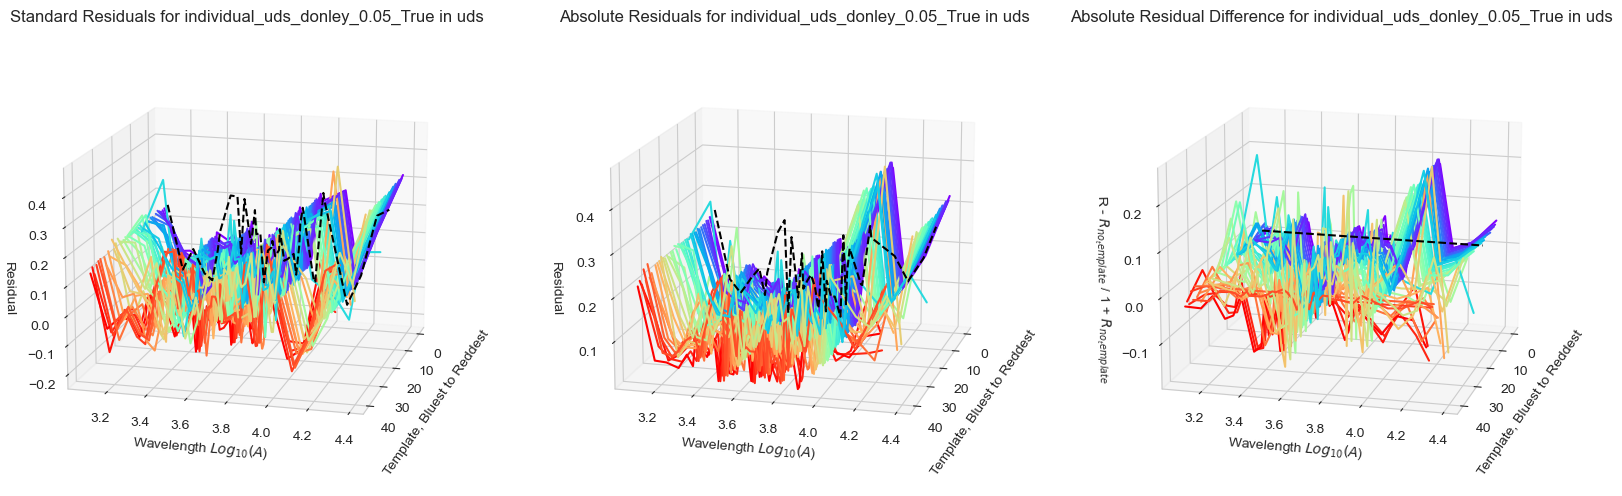

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 40), subplot_kw={'projection': '3d'})
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(true_to_BtR))]
for my_temp, BtR_temp in enumerate(true_to_BtR):
    # temp_number -= 1 # to get the correct template number
    ax1.plot([BtR_temp] * residual_df.shape[0], y_value(my_temp), z_value_copy(my_temp), label=f'{i}', color=colors[BtR_temp-1])
    ax2.plot([BtR_temp] * residual_df.shape[0], y_value(my_temp), z_value(my_temp), label=f'{i}', color=colors[BtR_temp-1])
    ax3.plot([BtR_temp] * residual_df.shape[0], y_value(my_temp), diff_value(my_temp), label=f'{i}', color=colors[BtR_temp-1])

ax1.plot([-1] * residual_df.shape[0], y_value(-1), z_value_copy(-1), label=f'{-1}', c='k', ls='--')
ax2.plot([-1] * residual_df.shape[0], y_value(-1), z_value(-1), label=f'{-1}', c='k', ls='--')
ax3.plot([-1] * residual_df.shape[0], y_value(-1), [0] * residual_df.shape[0], label=f'{-1}', c='k', ls='--')

ax1.set_xlabel('Template, Bluest to Reddest')
ax2.set_xlabel('Template, Bluest to Reddest')
ax3.set_xlabel('Template, Bluest to Reddest')

ax1.set_ylabel('Wavelength $Log_{10}(A$)')
ax2.set_ylabel('Wavelength $Log_{10}(A$)')
ax3.set_ylabel('Wavelength $Log_{10}(A$)')

ax1.set_zlabel('Residual')
ax2.set_zlabel('Residual')
ax3.set_zlabel('R - $R_{no_template}$ / 1 + $R_{no_template}$')

ax1.view_init(elev=15., azim=15)
ax2.view_init(elev=15., azim=15)
ax3.view_init(elev=15., azim=15)

ax1.set_title(f'Standard Residuals for {test_title} in {field}')
ax2.set_title(f'Absolute Residuals for {test_title} in {field}')
ax3.set_title(f'Absolute Residual Difference for {test_title} in {field}')

Plotting each Residual on the same plot, using N subplots

C:\Users\eddie\AppData\Local\Temp\ipykernel_12976\963714528.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sub_plot_list = np.array(sub_plot_list)


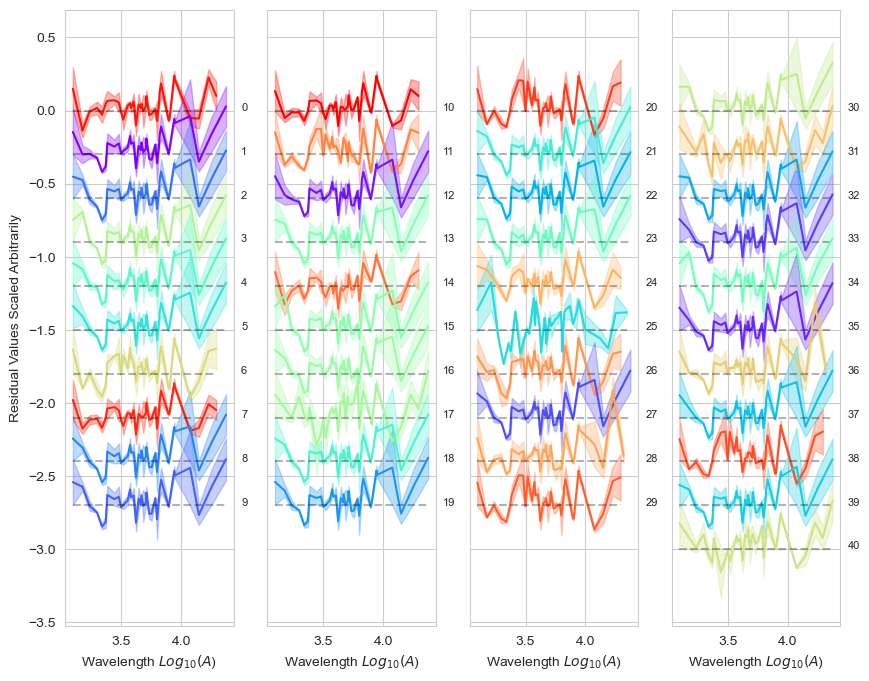

In [370]:
# Need to split the templates into N sets, then scale each template residual to fit onto the same plot
number_of_subplots = 4
number_of_templates = len(true_to_BtR)
number_of_templates_per_subplot = number_of_templates // number_of_subplots
number_of_templates_last_subplot = number_of_templates_per_subplot + (number_of_templates % number_of_subplots) # last subplot has the remainder

# making an array with a list of templates in each subplot
starting_template = 0
sub_plot_list = []
for sub_plot_no in range(number_of_subplots):

    if sub_plot_no != number_of_subplots-1:
        sub_plot_list.append(np.linspace(starting_template, starting_template - 1 + number_of_templates_per_subplot, number_of_templates_per_subplot, dtype=int))
        starting_template = starting_template + number_of_templates_per_subplot
    else:
        sub_plot_list.append(np.linspace(starting_template, starting_template - 1 + number_of_templates_last_subplot, number_of_templates_last_subplot, dtype=int))

sub_plot_list = np.array(sub_plot_list)

scaling_factor = - 0.3 # what is taken away for each subsequent template
fig, axs = plt.subplots(nrows=1, ncols=number_of_subplots, figsize=(10, 8), sharex=True, sharey=True)

for idx, template_list in enumerate(sub_plot_list):
    ax = axs[idx]

    for idi, my_temp in enumerate(template_list):
        BtR_val = true_to_BtR[my_temp]
        ax.plot(y_value(my_temp),
                z_value_copy(my_temp) + scaling_factor * idi,
                label=f'{my_temp}', color=colors[BtR_val-1])

        ax.fill_between(y_value(my_temp),
                        z_value_copy(my_temp) + scaling_factor * idi - c_value(my_temp),
                        z_value_copy(my_temp) + scaling_factor * idi + c_value(my_temp),
                        alpha=0.3, color=colors[BtR_val-1])

        ax.plot(y_value(my_temp),
                np.linspace(0, 0, len(y_value(my_temp))) + scaling_factor * idi,
                c='k', ls='--', alpha=0.3)

        ax.text(4.5, 0 + scaling_factor * idi, f'{my_temp}', fontsize=8)

    ax.set_xlabel('Wavelength $Log_{10}(A$)')

    if idx == 0:
        ax.set_ylabel('Residual Values Scaled Arbitrarily')

In [76]:
# ranking the templates by the total of their absolute residuals
single_df = gs.load_key_data(output_location, field, test_title)
all_residual_key_data_df = pd.DataFrame(columns=['template', 'BtR_template','NMAD', 'OLF', 'CRPS', 'total_residuals_sum', 'min_residual_count'])

# getting the best in bin counts
best_template_residual = []
for idx, temp_number in enumerate(true_to_BtR):
    best_template_residual.append(diff_value(idx))

best_template_residual = np.array(best_template_residual)
best_template_residual = np.transpose(best_template_residual)
best_template_residual_each = np.unique(np.argmin(best_template_residual, axis=1), return_counts=True)
best_template_df = pd.DataFrame(np.transpose(best_template_residual_each))
best_template_df.columns = ['Template', 'Count']


for my_temp, BtR_temp in enumerate(true_to_BtR):

    if 'mean CRPS' not in single_df.columns:
        single_df['mean CRPS'] = 0

    if 'outlier_fraction' not in single_df.columns:
        single_df['outlier_fraction'] = single_df['outlier_count'] / single_df['spec_count']

    template_count = best_template_df[best_template_df['Template'] == my_temp]['Count']

    if len(template_count) == 0:
        template_count = 0
    else:
        template_count = template_count.values[0]

    data_list = pd.DataFrame({'template': [my_temp],
                              'BtR_template': [BtR_temp],
                              'NMAD': [single_df['nmad_val'][my_temp]],
                              'OLF': [single_df['outlier_fraction'][my_temp]],
                              'CRPS': [single_df['mean CRPS'][my_temp]],
                              'total_residuals_sum': [np.sum(z_value(my_temp))],
                              'min_residual_count': [template_count]})

    all_residual_key_data_df = pd.concat([all_residual_key_data_df, data_list])

all_residual_key_data_df

C:\Users\eddie\AppData\Local\Temp\ipykernel_12976\4252678589.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_residual_key_data_df = pd.concat([all_residual_key_data_df, data_list])


,template,BtR_template,NMAD,OLF,CRPS,total_residuals_sum,min_residual_count
0,0,40,0.452064,0.666667,0.971049,3.698646,2
0,1,1,0.861520,0.666667,1.231444,4.173867,0
0,2,7,0.852442,0.666667,1.224036,4.189768,0
0,3,25,0.837823,0.666667,1.210734,4.257800,0
0,4,18,0.846071,0.666667,1.210744,4.134572,1
0,5,15,0.853821,0.666667,1.231207,4.132758,0
0,6,28,0.037717,0.333333,0.739688,4.380059,0
0,7,39,0.415964,0.666667,0.971049,3.319893,0
0,8,8,0.854964,0.666667,1.231304,4.130740,0
0,9,6,0.855435,0.666667,1.231309,4.129111,0


In [77]:
# creating template recommendations

# 1 added the normalised values for each of the parameters
all_residual_key_data_df['recommendation'] = gs.normalizer(all_residual_key_data_df['NMAD']) + \
                                            gs.normalizer(all_residual_key_data_df['OLF']) + \
                                            gs.normalizer(all_residual_key_data_df['CRPS']) + \
                                            gs.normalizer(all_residual_key_data_df['total_residuals_sum']) - \
                                            gs.normalizer(all_residual_key_data_df['min_residual_count'])
all_residual_key_data_df.sort_values(by='recommendation', inplace=True)
all_residual_key_data_df.reset_index(drop=True, inplace=True)
recommendation_list = [i[1]['template'] for i in all_residual_key_data_df.iterrows()]
print(recommendation_list)
# save recommendation list
save_recommendation = pd.DataFrame({'field': field,
                                    'id_key': id_key,
                                    'method': 'added',
                                    'recommendation': [recommendation_list]})

file_dir = f'G:/honours/outputs/other_data/recommendation_list.csv'
if not os.path.isfile(file_dir):
    save_recommendation.to_csv(file_dir, index=False)
else:
    save_recommendation.to_csv(file_dir, mode='a', header=False, index=False)

all_residual_key_data_df

[11, 26, 38, 29, 20, 6, 14, 10, 31, 0, 24, 25, 7, 36, 28, 34, 35, 16, 17, 4, 40, 15, 39, 27, 32, 33, 19, 37, 12, 22, 21, 9, 5, 8, 18, 30, 13, 2, 1, 3, 23]


,template,BtR_template,NMAD,OLF,CRPS,total_residuals_sum,min_residual_count,recommendation
0,11,34,0.033700,0.333333,0.739641,4.122747,2,0.112099
1,26,33,0.032121,0.333333,0.739641,4.212590,2,0.164576
2,38,37,0.035266,0.333333,0.739641,4.133869,1,0.320668
3,29,36,0.052030,0.333333,0.745725,4.260472,1,0.423666
4,20,38,0.049739,0.333333,0.740412,4.266015,0,0.618454
5,6,28,0.037717,0.333333,0.739688,4.380059,0,0.672487
6,14,35,0.426970,0.666667,0.971049,3.520037,4,1.065715
7,10,41,0.431259,0.666667,0.971049,3.417486,2,1.40874
8,31,30,0.011111,0.666667,1.557167,4.355791,5,1.529696
9,0,40,0.452064,0.666667,0.971049,3.698646,2,1.60324


C:\Users\eddie\AppData\Local\Temp\ipykernel_6276\2952240139.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(temp_number, np.mean(diff_value(idx)), c=colors[temp_number-1])


Text(0.5, 1.0, 'Average Residual Difference for individual_cosmos2_xray_agn_no_ovlp_0.05 in cosmos2')

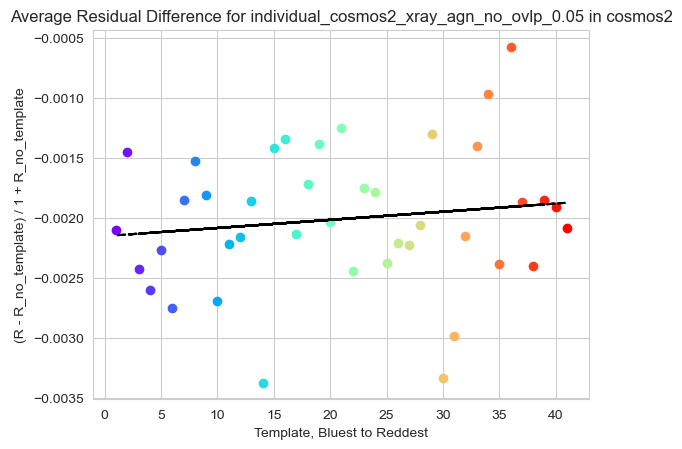

In [353]:
# averaging the residuals
from scipy.stats import linregress

average_res = []
for idx, temp_number in enumerate(true_to_BtR):
    average_res.append(np.mean(diff_value(idx)))
    plt.scatter(temp_number, np.mean(diff_value(idx)), c=colors[temp_number-1])

#plt.plot([0, len(x)], [0, 0], c='k', ls='-')
x_df = pd.DataFrame({'x':true_to_BtR})
sim_reg = linregress(x_df['x'], average_res)
plt.plot(x_df, sim_reg.intercept + sim_reg.slope * x_df['x'], c='k', ls='--')

plt.xlabel('Template, Bluest to Reddest')
plt.ylabel('(R - R_no_template) / 1 + R_no_template')
plt.title(f'Average Residual Difference for {test_title} in {field}')

C:\Users\eddie\AppData\Local\Temp\ipykernel_6276\269062742.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(temp_number, single_df['nmad_val'][idx], np.mean(diff_value(idx)), c=colors[temp_number-1])


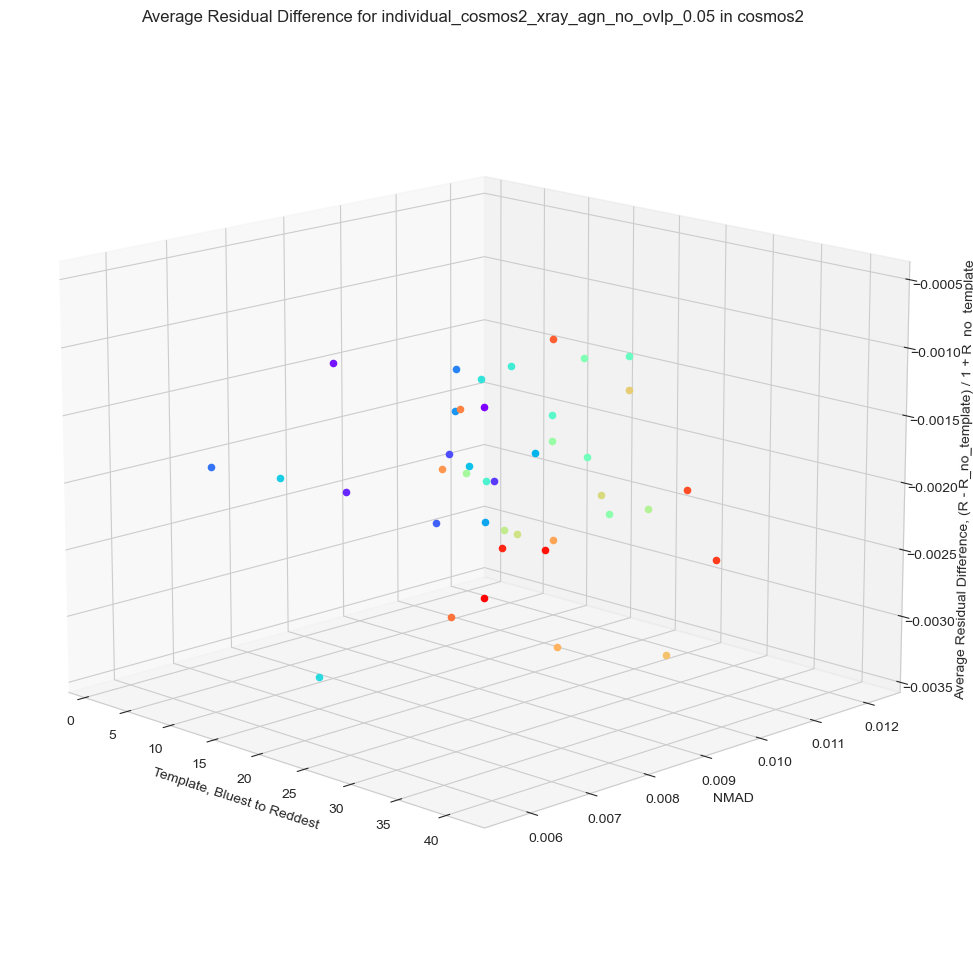

In [354]:
# plotting above with nmad values

fig, ax = plt.subplots(1, 1, figsize=(12, 12), subplot_kw={'projection': '3d'})

for idx, temp_number in enumerate(true_to_BtR):
    ax.scatter(temp_number, single_df['nmad_val'][idx], np.mean(diff_value(idx)), c=colors[temp_number-1])

ax.set_xlabel('Template, Bluest to Reddest')
ax.set_ylabel('NMAD')
ax.set_zlabel('Average Residual Difference, (R - R_no_template) / 1 + R_no_template')
ax.set_title(f'Average Residual Difference for {test_title} in {field}')
ax.view_init(elev=15., azim=-45)

In [267]:
# PCA of residuals to see which templates are the most similar in terms of fitting.
# first up, normalisation. I want to use the copy, as it has the negative values and therefore more variance.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

residual_df_copy = residual_df.filter(regex='^rc_') # we want the copy
residual_df_copy = residual_df_copy.drop(columns=['rc_-1']) # remove no template column
scaler = StandardScaler()
data_standardised = scaler.fit_transform(residual_df_copy)
residual_df_copy_standardised = pd.DataFrame(np.transpose(data_standardised))
residual_df_copy_standardised.describe()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-2.716031,-3.088230,-0.536170,0.300325,0.941774,0.987028,0.696173,0.132883,-1.555506,-2.702571,...,1.484903,1.956575,0.728500,0.439129,-0.079109,-1.835837,-2.296938,-1.154010,-0.869717,-1.085464
std,0.405028,0.312671,0.365019,0.401475,0.247955,0.194819,0.275101,0.233691,0.184734,0.240708,...,0.146557,0.174809,0.109557,0.075888,0.064551,0.114530,0.251041,0.341012,0.533461,1.240131
min,-4.042763,-3.677352,-1.223685,-0.598353,0.479034,0.614694,0.256522,-0.248003,-1.939371,-3.290948,...,0.762226,1.216738,0.304871,0.101499,-0.298839,-2.029945,-2.656486,-1.514791,-1.617913,-3.575282
25%,-2.900829,-3.330228,-0.745526,0.072954,0.811347,0.829631,0.438640,-0.139674,-1.667509,-2.858930,...,1.481535,1.910778,0.708002,0.424663,-0.105518,-1.927021,-2.420317,-1.399086,-1.294688,-1.811051
50%,-2.680803,-3.135377,-0.640708,0.356077,0.942828,1.023310,0.696318,0.173019,-1.566306,-2.666716,...,1.510137,1.973951,0.745083,0.456691,-0.068062,-1.854255,-2.347905,-1.232035,-0.929947,-1.429216
75%,-2.524398,-2.849692,-0.319082,0.611123,1.111262,1.117884,0.886725,0.314252,-1.430516,-2.543669,...,1.545238,2.036141,0.790346,0.474488,-0.050151,-1.783513,-2.205589,-0.995189,-0.595732,-0.182204
max,-1.687905,-2.467920,0.284313,1.039218,1.396779,1.375796,1.255753,0.591631,-1.130216,-2.199388,...,1.659732,2.262251,0.888854,0.535283,0.073829,-1.465211,-1.267207,0.246503,1.213041,2.932714


C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\s

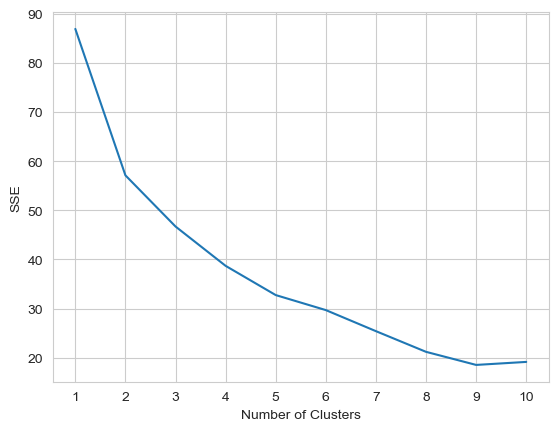

In [253]:
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
data_pca = pca.fit_transform(np.transpose(data_standardised))

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(np.transpose(data_standardised))
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [203]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(np.transpose(data_standardised))

#view cluster assignments for each observation
kmeans.labels_

C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2])

Text(0, 0.5, 'Principal Component 2')

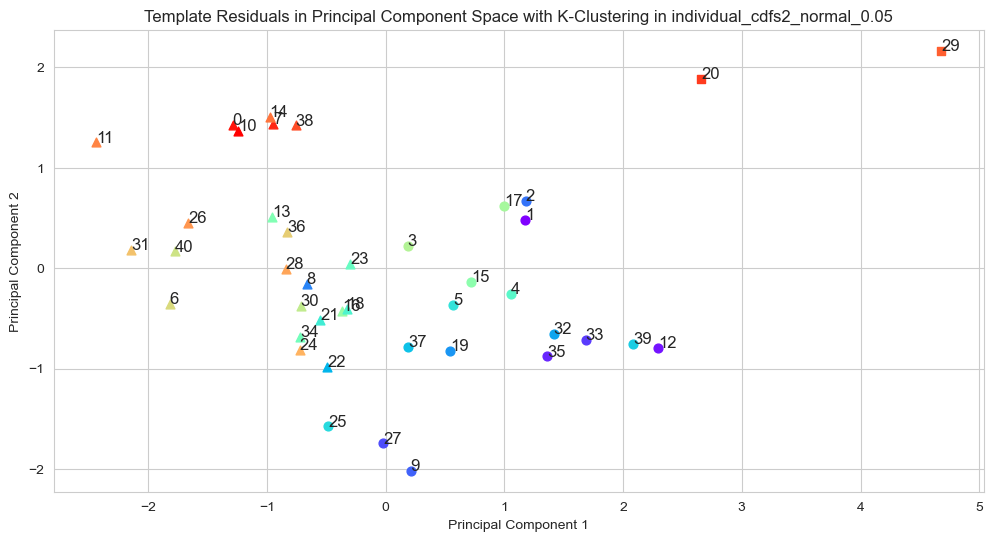

In [204]:
plt.figure(figsize=(12, 6))
markers = ['o', 's', '^']
colours_list = []
for idx, template in enumerate(true_to_BtR):
    colours_list.append(colors[template-1])

for idx,colour in enumerate(colours_list):
    plt.text(data_pca[idx, 0], data_pca[idx, 1], f'{idx}', fontsize=12)
    if kmeans.labels_[idx] == 0:
        plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=f'Template {true_to_BtR[idx]}', marker=markers[kmeans.labels_[idx]], color=colour, s=40)
    elif kmeans.labels_[idx] == 1:
        plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=f'Template {true_to_BtR[idx]}', marker=markers[kmeans.labels_[idx]], color=colour, s=40)
    else:
        plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=f'Template {true_to_BtR[idx]}', marker=markers[kmeans.labels_[idx]], color=colour, s=40)
#plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f"Template Residuals in Principal Component Space with K-Clustering in {test_title}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

In [205]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by component: {explained_variance}")
total_explained_variance = np.sum(explained_variance)
print(f"Total explained variance: {total_explained_variance}")

Explained variance by component: [0.48743259 0.23047348]
Total explained variance: 0.7179060783200816


## Chi 2 vs Nmad for each template

In [206]:
test_title = 'individual_donley_main_0.05'
output_location = 'G:/honours/outputs'
field = 'cdfs'
single_df = gs.load_key_data(output_location, field, test_title)
id_key = 'donley'
use_galaxy_templates = True
template_key = 'atlas_rest'
z_step = 0.05
chi2_all = []
for template in single_df['agn_templates']:
    single_temp_df = gs.load_individual(output_location, field, test_title, id_key, template_key, template, use_galaxy_templates, z_step, 'a')
    chi2_all.append(single_temp_df['chi2'])

In [207]:
def normalizer(array):
    new_array = np.zeros_like(array)
    for i in range(len(array)):
        if max(array[i]) == min(array[i]):
            new_array[i] = np.zeros_like(array[i])
        else:
            new_array[i] = (array[i] - min(array[i])) / (max(array[i]) - min(array[i]))
    return new_array

chi2_array = normalizer(np.transpose(np.array(chi2_all)))

best_fit = np.zeros((len(chi2_array), 3))
for fit in range(len(chi2_array)):
    min_indices = np.argmin(chi2_array[fit])
    best_fit[fit] = [chi2_array[fit, min_indices], single_df[(single_df['agn_templates'] == f'[{min_indices}]')]['nmad_val'].iloc[0], min_indices]

best_fit_df = pd.DataFrame(best_fit, columns=['chi2', 'nmad', 'template'])
best_fit_df.sort_values(by='nmad', inplace=True)
all_templates = np.round(best_fit_df['template'].unique(), 0).astype(int)
all_best_fit = pd.DataFrame(columns=['nmad', 'template', 'counts'])
for template in all_templates:
    counts = len(best_fit_df[best_fit_df['template'] == template])
    data_list = pd.DataFrame({'nmad':[best_fit_df[best_fit_df['template'] == template].iloc[0,1]], 'template':[template], 'counts':[counts]})
    all_best_fit = pd.concat([all_best_fit, data_list])
all_best_fit

C:\Users\eddie\AppData\Local\Temp\ipykernel_6276\2023679570.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_best_fit = pd.concat([all_best_fit, data_list])


,nmad,template,counts
0,0.028890,37,6
0,0.029024,1,13
0,0.029420,5,13
0,0.029933,12,9
0,0.030419,2,11
0,0.034171,10,20
0,0.038427,35,4
0,0.039575,39,1
0,0.040379,27,9
0,0.041980,32,7


Text(0.5, 1.0, 'Chi2 vs Nmad for each template')

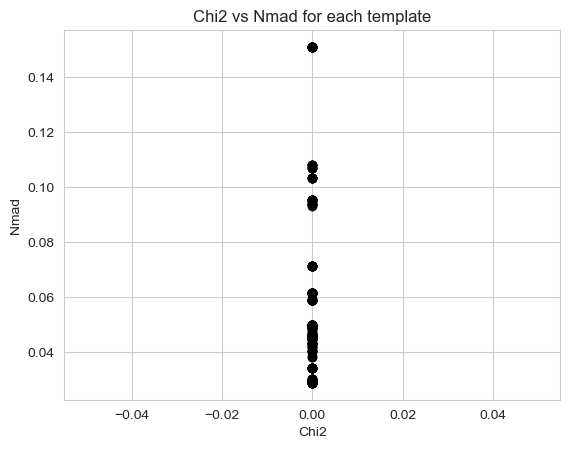

In [208]:
plt.scatter(best_fit_df['chi2'], best_fit_df['nmad'], c='k', alpha=0.5)
plt.xlabel('Chi2')
plt.ylabel('Nmad')
plt.title('Chi2 vs Nmad for each template')

Text(0.5, 1.0, 'Counts for each template')

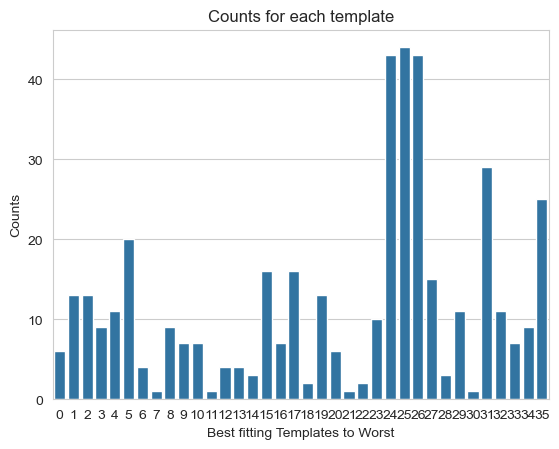

In [209]:
fig = plt.plot(figsize=(12, 6))

x_data = np.linspace(0, len(all_best_fit['template']) - 1, len(all_best_fit['template']), dtype=int)
sns.barplot(data=all_best_fit,x=x_data, y='counts')
plt.xlabel('Best to Worst fitting Templates')
plt.ylabel('Counts')
plt.title('Counts for each template')

## Outlier Fraction Plots

In [210]:
test_title = 'individual_normal_0.05'
field = 'cdfs'
output_location = 'G:/honours/outputs'

# so similar to template_auto_reload, I need to open spec data and the individual data to produce a df to compare
id_key = 'normal' # normal, high or low
import global_settings as gs
id_key_dict = gs.get_id_dict(field)

#Setting up the main catalogue
main_cat = pd.read_csv(id_key_dict[id_key]) # get the catalogue for the id_key
main_cat.to_csv('inputs/eazy_reload.cat', index=False) # create a new catalogue, allows for change to be made in this cell

main = pd.read_csv('inputs/eazy_reload.cat', sep=" ", comment="#", header=None, skipinitialspace=True) # opening cut cat, and adjusting it
headers = pd.read_csv('inputs/eazy_reload.cat', sep=" ", header=None, nrows=1).iloc[0]
headers = headers[1:]
main.columns = headers
agn_per_dir = f'inputs/{field}_agn_frac.txt' # file with AGN fractions for each object, prepared in catalogue_prepare.ipynb
all_bayes = pd.read_csv(agn_per_dir, sep="\s+", comment='#')

has_fraction = 'bayes.agn.fracAGN' in main.columns
if not has_fraction:
    main = pd.merge(main, all_bayes, on='id', how='left') # AGN fraction for each object


In [211]:
# opening each template and making a df
all_test_csv = glob.glob(f'{output_location}/{field}/{test_title}/induvidual_data_*.csv')
all_test_csv

['G:/honours/outputs/cdfs/individual_normal_0.05\\induvidual_data_cdfs_normal_0.05_[0]_True.csv',
 'G:/honours/outputs/cdfs/individual_normal_0.05\\induvidual_data_cdfs_normal_0.05_[10]_True.csv',
 'G:/honours/outputs/cdfs/individual_normal_0.05\\induvidual_data_cdfs_normal_0.05_[11]_True.csv',
 'G:/honours/outputs/cdfs/individual_normal_0.05\\induvidual_data_cdfs_normal_0.05_[12]_True.csv',
 'G:/honours/outputs/cdfs/individual_normal_0.05\\induvidual_data_cdfs_normal_0.05_[13]_True.csv',
 'G:/honours/outputs/cdfs/individual_normal_0.05\\induvidual_data_cdfs_normal_0.05_[14]_True.csv',
 'G:/honours/outputs/cdfs/individual_normal_0.05\\induvidual_data_cdfs_normal_0.05_[15]_True.csv',
 'G:/honours/outputs/cdfs/individual_normal_0.05\\induvidual_data_cdfs_normal_0.05_[16]_True.csv',
 'G:/honours/outputs/cdfs/individual_normal_0.05\\induvidual_data_cdfs_normal_0.05_[17]_True.csv',
 'G:/honours/outputs/cdfs/individual_normal_0.05\\induvidual_data_cdfs_normal_0.05_[18]_True.csv',
 'G:/honour

In [212]:
phot_redshift_df = pd.DataFrame()
for template in all_test_csv:
    template_no = template.split('_')[-2]
    template_df = pd.read_csv(template, usecols=['phot_redshift'])
    template_df.rename(columns={'phot_redshift':f'{template_no[1:-1]}'}, inplace=True)
    phot_redshift_df = pd.concat([phot_redshift_df, template_df], axis=1)

phot_redshift_df

,0,10,11,12,13,14,15,16,17,18,...,38,39,3,40,4,5,6,7,8,9
0,0.613792,0.613753,0.613818,0.613196,0.613157,0.613700,0.613645,0.613158,0.613465,0.613136,...,0.613705,0.613322,0.613334,0.613663,0.613066,0.613314,0.613481,0.613760,0.613311,0.613298
1,0.391814,0.390945,0.392581,0.391813,0.390345,0.390667,0.389826,0.391141,0.389200,0.389244,...,0.393529,0.390534,0.389771,0.390626,0.392705,0.390718,0.390335,0.391120,0.390710,0.390229
2,0.937374,0.925622,0.934983,0.940647,0.923085,0.920388,0.941996,0.939333,0.943479,0.936759,...,0.946335,0.941435,0.933548,0.941115,0.936526,0.938666,0.938672,0.925438,0.933790,0.940423
3,4.039647,4.039684,4.039661,4.039595,4.039966,4.039620,4.039310,4.039892,4.040173,4.039957,...,4.039212,4.039785,4.039537,4.040177,4.039679,4.039825,4.039762,4.039732,4.039912,4.039463
4,4.904108,4.905385,4.903478,4.892801,4.895870,4.905242,4.871871,4.894180,4.854821,4.899923,...,4.901493,4.902227,4.874928,4.903926,4.882406,4.858450,4.903430,4.905682,4.863361,4.872833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30906,2.554747,2.554826,2.555410,2.540476,2.546444,2.562329,2.528224,2.542832,2.565105,2.551911,...,2.553225,2.552744,2.554886,2.557336,2.539422,2.535757,2.562664,2.558467,2.547230,2.547016
30907,1.087281,1.088712,1.084527,1.095676,1.087802,1.088553,1.089442,1.087916,1.085534,1.088216,...,1.083819,1.089930,1.088132,1.086838,1.096215,1.088949,1.086535,1.088893,1.088277,1.096469
30908,0.245668,0.247244,0.244188,0.241057,0.245043,0.248373,0.241946,0.241927,3.159979,0.242741,...,0.243437,0.239556,0.243731,0.241190,0.246379,0.243070,0.244865,0.246836,0.244803,0.240123
30909,2.390528,2.390744,2.391697,2.393242,2.391878,2.390507,2.391607,2.392724,2.390722,2.392744,...,2.390438,2.392997,2.391345,2.393122,2.392262,2.386027,2.392730,2.391033,2.392195,2.391827


In [213]:
all_templates = phot_redshift_df.columns
rms_df = pd.DataFrame()
for template in all_templates:
    rms_val_out, outlier_fraction = rms(phot_redshift_df[template], main['z_spec'], outlier=True)
    rms = rms(phot_redshift_df[template], main['z_spec'])
    nmad =
    data_list = pd.DataFrame({'template':[template], 'rms_out':[rms_val_out], 'rms':[rms], 'outlier_fraction':[outlier_fraction]})
    rms_df = pd.concat([rms_df, data_list])
rms_df

SyntaxError: invalid syntax (612399512.py, line 6)

In [ ]:
# rms plotted against outlier fraction
plt.scatter(rms_df['rms'], rms_df['outlier_fraction'])
plt.xlabel('RMS')
plt.ylabel('Outlier Fraction')
plt.title('RMS vs Outlier Fraction for each template')

## Reloading Test Values from Pickled Files

In [181]:
# Set the title of the test, and it wil load up the lnp values from each test
test_title = 'main_template_sets_3'
value_to_load = ['lnp', 'zgrid', 'full_logprior', 'ZSPEC', 'zbest', 'chi2_best', 'NFILT', 'OBJID'] # will be added to the object, like self.lnp

# checking each field for the test and opening each csv file and making a concat df (there should only be one csv file in each folder, which contains key info)
all_fields = glob.glob(f'{output_location}/*')

fields_with_test = []
all_test_original = pd.DataFrame()

for field in all_fields:
    if os.path.exists(f'{field}/{test_title}'):
        current_field = field.split('\\')[-1]
        fields_with_test.append(current_field)
        csv_name = glob.glob(f'{field}/{test_title}/*.csv')
        current_field_data = pd.read_csv(f'{csv_name[0]}') # should only be one csv file
        field_column = pd.Series([current_field] * len(current_field_data), name='field')
        current_field_data = pd.concat([field_column, current_field_data], axis=1)
        all_test_original = pd.concat([all_test_original, current_field_data])

all_test_original.reset_index(drop=True, inplace=True)
all_test_true = all_test_original.copy() # contains the correct data, used for finding the files
all_test_data = all_test_original.copy() # contains the data that will be used
# If only the galaxy templates are used, the template key is EAZY
for index, row in all_test_original.iterrows():
    if all_test_original['agn_templates'][index]== '[]' and all_test_original['galaxy templates'][index]:
            all_test_data.loc[index, 'template_key'] = 'EAZY'


all_test_data.to_csv(f'{output_location}/other_data/{test_title}_all.csv', index=False)
all_test_data

,field,id_key,zstep,template_key,agn_templates,galaxy templates,t_combos,total_obj,mean_agn_frac,spec_count,outlier_count,nmad_val,outlier_nmad,outlier_scatter,outlier_fraction,bias,mean CRPS
0,cdfs2,normal,0.05,atlas_rest,[29],True,a,30911,0.202547,1324,71,0.019189,0.017618,0.027240,0.053625,-0.006735,0.137883
1,cdfs2,normal,0.05,EAZY,[],True,a,30911,0.202547,1324,72,0.019361,0.017770,0.027006,0.054381,-0.006651,0.138021
2,cdfs2,normal,0.05,atlas_all,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,1,30911,0.202547,1318,67,0.020773,0.019251,0.031182,0.050835,-0.018787,0.139109
3,cdfs2,normal,0.05,XMM,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,1,30911,0.202547,1182,242,0.056989,0.037824,0.056126,0.204738,-0.048716,0.361011
4,cdfs2,lacy_no_ovlp,0.05,atlas_rest,[27],True,a,1969,0.200351,162,8,0.031270,0.030528,0.038396,0.049383,0.036915,0.148176
5,cdfs2,lacy_no_ovlp,0.05,EAZY,[],True,a,1969,0.200351,162,7,0.033973,0.032045,0.042603,0.043210,0.038218,0.160345
6,cdfs2,lacy_no_ovlp,0.05,atlas_all,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,1,1969,0.200351,162,5,0.027451,0.026528,0.039553,0.030864,0.001710,0.135556
7,cdfs2,lacy_no_ovlp,0.05,XMM,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,1,1969,0.200351,154,40,0.072688,0.046447,0.057434,0.259740,0.010399,0.579376
8,cdfs2,xray_agn_no_ovlp,0.05,atlas_rest,[29],True,a,106,0.110969,71,1,0.015750,0.014793,0.025919,0.014085,-0.008204,0.067294
9,cdfs2,xray_agn_no_ovlp,0.05,EAZY,[],True,a,106,0.110969,71,2,0.015128,0.014629,0.019257,0.028169,-0.006031,0.068647


In [182]:
# saves the data in value_to_load for each test in a dictionary, with the index above as the key
data_dict = {}

for index, row in all_test_true.iterrows():
    field = row['field']
    id_key = row['id_key']
    template_key = row['template_key']
    use_galaxy_templates = row['galaxy templates']
    z_step = row['zstep']
    template_combos = row['t_combos']
    agn_template = gs.inv_check_template(row['agn_templates'], template_key) # if all templates, returns 'all'

    test_obj = gs.load_self('main', output_location, field, test_title, id_key, template_key, agn_template, use_galaxy_templates, z_step, template_combos) # finds the pickle

    attribute_dict = {attr: getattr(test_obj, attr) for attr in value_to_load}

    data_dict[index] = attribute_dict

# save the dictionary
with open(f'{output_location}/other_data/{test_title}_data_dict.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

In [183]:
# load the dictionary
with open(f'{output_location}/other_data/{test_title}_data_dict.pkl', 'rb') as f:
    data_dict = pickle.load(f)

# get the indexes for each test
test_index = pd.DataFrame(columns=['field', 'id_key', 'index'])
unique_field = all_test_data['field'].unique()
id_key_unique = all_test_data['id_key'].unique()

# create a df with all the possible combinations
for field in unique_field:
    for id_key in id_key_unique:
        data_list = pd.DataFrame({'field':[field], 'id_key':[id_key], 'index': 0})
        test_index = pd.concat([test_index, data_list])
test_index.reset_index(drop=True, inplace=True)

def find_matching_indices(row, all_data):
    matches = all_test_data[(all_data['field'] == row['field']) & (all_data['id_key'] == row['id_key'])]
    return matches.index.tolist()


test_index['index'] = test_index.apply(lambda row: find_matching_indices(row, all_test_data), axis=1)
test_index

,field,id_key,index
0,cdfs2,normal,"[0, 1, 2, 3]"
1,cdfs2,lacy_no_ovlp,"[4, 5, 6, 7]"
2,cdfs2,xray_agn_no_ovlp,"[8, 9, 10, 11]"
3,cdfs2,donley,"[12, 13, 14, 15]"
4,cosmos2,normal,"[16, 17, 18, 19]"
5,cosmos2,lacy_no_ovlp,"[20, 21, 22, 23]"
6,cosmos2,xray_agn_no_ovlp,"[24, 25, 26, 27]"
7,cosmos2,donley,"[28, 29, 30, 31]"
8,uds,normal,"[32, 33, 34, 35]"
9,uds,lacy_no_ovlp,"[36, 37, 38, 39]"


With the data loaded, any visualisation can be done. The next cell requires value_to_load = ['lnp', 'zgrid', 'full_logprior', 'ZSPEC'], as it pertains to the likilihoods of the data

In [ ]:
# making alternate lnps
std = gs.smooth_to_percent(data_dict[1]['lnp'], data_dict[1]['ZSPEC'], data_dict[1]['zgrid'], 1)
std

In [ ]:
# quick check to look at individual objects for each test
check_field = 'cdfs2'
check_id_key = 'normal'

test_index_sel = test_index[(test_index['field'] == check_field) & (test_index['id_key'] == check_id_key)]['index'].iloc[0]
print(test_index_sel)
zgrid = data_dict.get(test_index_sel[0])['zgrid']
np.array(data_dict[test_index_sel[0]]['ZSPEC'])

^ ive printed out all the zpec values, so it is easier to find a lnp to look at below

In [ ]:
# plotting the redshift differences for each template set
all_redshift_data = pd.DataFrame()
for no, index in enumerate(test_index_sel):
    data_index = data_dict.get(index)
    template_set = all_test_data['template_key'][index]
    phot_data = data_index['zbest']
    spec_data = data_index['ZSPEC']
    redshift_data = pd.DataFrame({'template set': template_set, 'phot':phot_data, 'spec':spec_data})
    redshift_data = redshift_data[redshift_data['spec'] > 0]
    redshift_data['diff'] = (redshift_data['phot'] - redshift_data['spec']) / (1 + redshift_data['spec'])
    all_redshift_data = pd.concat([all_redshift_data, redshift_data])

all_redshift_data.reset_index(drop=True, inplace=True)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.histplot(data=all_redshift_data, x='diff', hue='template set', bins=100, kde=True, log_scale=False, ax=axes[0])
plt.title(f'{check_field} {check_id_key} Redshift Differences')
sns.histplot(data=all_redshift_data, x='diff', hue='template set', bins=100, kde=True, log_scale=True, ax=axes[1])
plt.title(f'{check_field} {check_id_key} Redshift Differences (Log Scale)')

In [ ]:
# plotting the lnps
check_object  = 2255
all_z_est = []
all_lnps = []
for no, index in enumerate(test_index_sel):
    data_index = data_dict.get(index)

    template_set = all_test_data['template_key'][index]

    all_lnps.append(data_index['lnp'][check_object])
    unlog_likelihood = gs.lnp_to_prob(data_index['lnp'][check_object], zgrid) # is the same as np.exp(data_index['lnp'][check_object])
    plt.plot(zgrid, unlog_likelihood, label=f"p - {template_set}")

    my_max, my_lnp = gs.parabola_fit(zgrid, data_index['lnp'][check_object])
    all_z_est.append(f"{template_set}-Z: {my_max:.4f}")

# plotting the added pdf
added_prob = gs.prob_adder(all_lnps)
added_prob_norm = added_prob - max(added_prob) # bring the max value to 0, so that it can be normalised
added_prob_norm = gs.lnp_to_prob(added_prob_norm, zgrid)
my_max, my_lnp = gs.parabola_fit(zgrid, added_prob)
plt.plot(zgrid, added_prob_norm, label='Added Probabilities')
all_z_est.append(f"Added Prob-Z: {my_max:.4f}")

# plotting HB
alpha = 3
f_max = 1
f_min = 0
hb_prob = gs.hierarchical_bayes(alpha, all_lnps, f_max, f_min)
hb_prob_norm = hb_prob - max(hb_prob) # bring the max value to 0, so that it can be normalised
hb_prob_norm = gs.lnp_to_prob(hb_prob_norm, zgrid)
my_max, my_lnp = gs.parabola_fit(zgrid, hb_prob)
plt.plot(zgrid, hb_prob_norm, label='Hierarchical Bayes')
all_z_est.append(f"HB-Z: {my_max:.4f}")

# plotting the true redshift
if data_dict[test_index_sel[0]]['ZSPEC'][check_object] > 0:
        plt.axvline(x=data_dict[test_index_sel[0]]['ZSPEC'][check_object], color='r', linestyle='--', label='Z Spec')
all_z_est.append(f"Z True: {data_dict[test_index_sel[0]]['ZSPEC'][check_object]:.4f}")

# text box
combined_text = "\n".join(all_z_est)
plt.text(1.35, 0.05, combined_text,
         horizontalalignment='right', verticalalignment='bottom',
         transform=plt.gca().transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# plotting a random pdf
high_zgrid = np.linspace(0, 6, 1000)
pdf_data = gs.peak_to_normal(data_dict[test_index_sel[2]]['lnp'][check_object], zgrid, high_zgrid, 0.5)[0].flatten()
plt.plot(high_zgrid, pdf_data, label='Normal Distribution')

plt.title(f'{check_field} {check_id_key} {check_object}')
plt.xlim(0,6)
plt.legend()
plt.legend(bbox_to_anchor=(1.04,0.7), loc="center left", borderaxespad=0)

In [ ]:
all_stds = []
for no, index in enumerate(test_index_sel):
    print(index)
    std = gs.smooth_to_percent(data_dict[index]['lnp'], data_dict[index]['ZSPEC'], data_dict[index]['zgrid'], 3)
    all_stds.append(std)
all_stds

In [ ]:
# Plotting the same plot, but with the pdf generated from smooth to percent
all_pdfs = []
pdf_grid = np.linspace(-0.2, 0.2, 1000)
for no, index in enumerate(test_index_sel):
    print(index)
    normal = 1/(np.sqrt(2 * np.pi * all_stds[no] ** 2)) * np.exp(-0.5 * (pdf_grid / all_stds[no]) ** 2)
    all_pdfs.append([pdf_data])
    plt.plot(pdf_grid, normal, label=f'pdf - {all_test_data["template_key"][index]}')

plt.legend()
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.title(f'{check_field} {check_id_key} All PDFs')

As i have made a couple different redshift calculations, to make the next few plotting code cells more efficient, i will fold these new inferred redshifts in to the data dict, all_test_data and test_index. Skip this cell if you don't want these new redshifts.

In [184]:
# copying the original df
all_test_copy = all_test_data.copy()

In [185]:
# first, adding to all_test_data
new_redshift_calculations = ['Added', 'HB']

# copying the original df
all_test_data = all_test_copy.copy()

# get the indexes for each test
unique_field = all_test_data['field'].unique()
id_key_unique = all_test_data['id_key'].unique()

for field in unique_field:
    for id_key in id_key_unique:
        for redshift_calc in new_redshift_calculations:
            data_list = pd.DataFrame({'field':field, 'id_key':id_key, 'template_key': redshift_calc, 'agn_templates': '[]', 'galaxy templates': False, 'zstep': [0.05]})
            all_test_data = pd.concat([all_test_data, data_list])

all_test_data.reset_index(drop=True, inplace=True)
all_test_data

,field,id_key,zstep,template_key,agn_templates,galaxy templates,t_combos,total_obj,mean_agn_frac,spec_count,outlier_count,nmad_val,outlier_nmad,outlier_scatter,outlier_fraction,bias,mean CRPS
0,cdfs2,normal,0.05,atlas_rest,[29],True,a,30911.0,0.202547,1324.0,71.0,0.019189,0.017618,0.027240,0.053625,-0.006735,0.137883
1,cdfs2,normal,0.05,EAZY,[],True,a,30911.0,0.202547,1324.0,72.0,0.019361,0.017770,0.027006,0.054381,-0.006651,0.138021
2,cdfs2,normal,0.05,atlas_all,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,1,30911.0,0.202547,1318.0,67.0,0.020773,0.019251,0.031182,0.050835,-0.018787,0.139109
3,cdfs2,normal,0.05,XMM,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,1,30911.0,0.202547,1182.0,242.0,0.056989,0.037824,0.056126,0.204738,-0.048716,0.361011
4,cdfs2,lacy_no_ovlp,0.05,atlas_rest,[27],True,a,1969.0,0.200351,162.0,8.0,0.031270,0.030528,0.038396,0.049383,0.036915,0.148176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,uds,lacy_no_ovlp,0.05,HB,[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,uds,xray_agn_no_ovlp,0.05,Added,[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,uds,xray_agn_no_ovlp,0.05,HB,[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,uds,donley,0.05,Added,[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# Now making the new redshift values, and storing them in the new_redshift_calculations_df, then saving it. Lastly, this will be opened and cut down for each test

new_redshift_calculations_df = pd.DataFrame(columns=['field', 'id', *new_redshift_calculations])

for field in ['cosmos2', 'uds']:
    print(f'Currently working on: {field}')
    print('---------------------------------')
    # Getting the old index eg: [0,1,2,3]
    old_index = test_index[(test_index['field'] == field) & (test_index['id_key'] =='normal')]['index'].iloc[0]
    old_redshift_dict = {}

    for index in old_index:
        data_index = data_dict.get(index)
        lnp_data = data_index['lnp']
        zgrid = data_index['zgrid']

        old_redshift_dict[index] = {'lnp': lnp_data, 'zgrid': zgrid}

    # Now with the LNPs for each template set, we can make the new redshifts
    for object_id in range(old_redshift_dict[old_index[0]]['lnp'].shape[0]):

        # Running the new redshift calculations
        new_redshift_add, new_redshift_HB = gs.new_redshift_maker(data_dict, object_id, old_index, zgrid)

        # Now adding the new redshifts to the new_redshift_calculations_df
        data_list = pd.DataFrame({'field': field, 'id':[object_id], 'Added':[new_redshift_add], 'HB':[new_redshift_HB]})
        new_redshift_calculations_df = pd.concat([new_redshift_calculations_df, data_list])

Currently working on: cosmos2
---------------------------------


C:\Users\eddie\PycharmProjects\SEDTemplate_conda\global_settings.py:459: RuntimeWarning: divide by zero encountered in log
  single_prob = np.log(single_prob)
C:\Users\eddie\AppData\Local\Temp\ipykernel_12976\4226404438.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_redshift_calculations_df = pd.concat([new_redshift_calculations_df, data_list])


Currently working on: uds
---------------------------------


In [194]:
new_redshift_calculations_df.reset_index(drop=True, inplace=True)
new_redshift_calculations_df['id'] = new_redshift_calculations_df['id'] + 1
#new_redshift_calculations_df.to_csv(f'{output_location}/other_data/{test_title}_new_redshifts.csv', index=False)

In [196]:
# grabbing from the file, and putting into data dict
new_redshift_calculations_df = pd.read_csv(f'{output_location}/other_data/{test_title}_new_redshifts.csv')
no_of_new_redshifts = len(new_redshift_calculations_df.columns) - 2

test_df_with_new = all_test_data[(all_test_data['template_key'] == 'Added') | (all_test_data['template_key'] == 'HB')]

for index, row in test_df_with_new.iterrows():
    print(index)
    field = row['field']
    id_key = row['id_key']
    new_red_type = row['template_key']

    # now grab the zspec and the object ID from the test index
    test_index_sel = test_index[(test_index['field'] == field) & (test_index['id_key'] == id_key)]['index'].iloc[0]
    if test_index_sel == []:
        continue
    zspec = data_dict[test_index_sel[0]]['ZSPEC']
    object_id = data_dict[test_index_sel[0]]['OBJID']

    # now grab the new redshifts
    new_red_cal_cut = new_redshift_calculations_df[(new_redshift_calculations_df['field'] == field)]
    new_red_cal_cut = new_red_cal_cut[new_red_cal_cut['id'].isin(object_id)]

    data_dict[index] = {'ZSPEC': zspec, 'OBJID': object_id, 'zbest': new_red_cal_cut[new_red_type], 'chi2_best': np.nan, 'NFILT': 1}

# save the dictionary
with open(f'{output_location}/other_data/{test_title}_data_dict_new.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


In [197]:
# load the dictionary
with open(f'{output_location}/other_data/{test_title}_data_dict_new.pkl', 'rb') as f:
    data_dict = pickle.load(f)

# get the indexes for each test
test_index = pd.DataFrame(columns=['field', 'id_key', 'index'])
unique_field = all_test_data['field'].unique()
id_key_unique = all_test_data['id_key'].unique()

# create a df with all the possible combinations
for field in unique_field:
    for id_key in id_key_unique:
        data_list = pd.DataFrame({'field':[field], 'id_key':[id_key], 'index': 0})
        test_index = pd.concat([test_index, data_list])
test_index.reset_index(drop=True, inplace=True)

def find_matching_indices(row, all_data):
    matches = all_test_data[(all_data['field'] == row['field']) & (all_data['id_key'] == row['id_key'])]
    return matches.index.tolist()


test_index['index'] = test_index.apply(lambda row: find_matching_indices(row, all_test_data), axis=1)
test_index

,field,id_key,index
0,cdfs2,normal,"[0, 1, 2, 3, 44, 45]"
1,cdfs2,lacy_no_ovlp,"[4, 5, 6, 7, 46, 47]"
2,cdfs2,xray_agn_no_ovlp,"[8, 9, 10, 11, 48, 49]"
3,cdfs2,donley,"[12, 13, 14, 15, 50, 51]"
4,cosmos2,normal,"[16, 17, 18, 19, 52, 53]"
5,cosmos2,lacy_no_ovlp,"[20, 21, 22, 23, 54, 55]"
6,cosmos2,xray_agn_no_ovlp,"[24, 25, 26, 27, 56, 57]"
7,cosmos2,donley,"[28, 29, 30, 31, 58, 59]"
8,uds,normal,"[32, 33, 34, 35, 60, 61]"
9,uds,lacy_no_ovlp,"[36, 37, 38, 39, 62, 63]"


## Plotting the statistics for each test

In [356]:
# setup
check_field = 'cdfs2'
check_id_key = 'donley' # id key, or 'all' for all

# grabbing the relevant data
if check_id_key == 'all':
    test_index_sel = test_index[test_index['field'] == check_field]['index']
    test_index_sel = [id_tests for id_tests in test_index_sel]
else:
    test_index_sel = test_index[(test_index['field'] == check_field) & (test_index['id_key'] == check_id_key)]['index']
    test_index_sel = [test_index_sel.iloc[0]] # grabs the list from the series

# setting some constant values
catastrophic_limit = 0.15
all_template_sets = all_test_data['template_key'].unique()
magnitude_band = 'f_I'

# agn fraction
agn_fractions = pd.read_csv(f'inputs/{check_field}_agn_frac.txt', sep="\s+", comment='#')
agn_fractions = agn_fractions.drop(['bayes.agn.fracAGN_err', 'bayes.agn.luminosity'], axis=1)

# magnitudes
all_cat = pd.read_csv(f'inputs/alternate_catalogues/{check_field}.normal.cat', sep=" ", comment="#", header=None, skipinitialspace=True)
headers = pd.read_csv(f'inputs/alternate_catalogues/{check_field}.normal.cat', sep=" ", header=None, nrows=1).iloc[0]
headers = headers[1:]
all_cat.columns = headers
magnitude = gs.flux_to_mag(all_cat[magnitude_band], 22.151)
magnitude_df = pd.DataFrame({'id':all_cat['id'], 'magnitude':magnitude})

# need to loop through each group of indexes corresponding to the field
test_stat_df = pd.DataFrame()
for all_test_in_id_key_index in test_index_sel:

    # Create a mask by checking if any element in the 'index' list matches any element in 'id_key_index'
    mask = test_index['index'].apply(lambda x: any(item in all_test_in_id_key_index for item in x))
    current_id_key = test_index[mask]['id_key'].iloc[0]

    one_of_the_tests = all_test_in_id_key_index[0] # returns the first test in the list, used for zpsec and such
    all_zspec = data_dict[one_of_the_tests]['ZSPEC'] # From the first test, as all tests  in check should have the same ZSPEC
    id_key_objects = data_dict[one_of_the_tests]['OBJID']
    id_key_objects = id_key_objects - 1 # to get the correct index for the true ids

    # putting in a df
    data_df = pd.DataFrame({'id_key': current_id_key, 'id':range(len(all_zspec)), 'true_id': id_key_objects, 'zspec': all_zspec})
    data_df = pd.merge(data_df, agn_fractions, left_on='true_id', right_on='id', how='left')
    data_df.rename(columns={'id_x': 'id'}, inplace=True)
    data_df = pd.merge(data_df, magnitude_df, on='id', how='left')
    data_df.rename(columns={'id_x': 'id'}, inplace=True)
    data_df.drop( 'id_y', axis=1, inplace=True) # added col from agn fraction merge
    data_df.reset_index(drop=True, inplace=True)

    for index in all_test_in_id_key_index:
        # adding the zphot and chi2 values for each template set to the df
        template_set = all_test_data['template_key'][index]
        single_zphot = data_dict.get(index)['zbest']
        single_chi2 = data_dict.get(index)['chi2_best']
        single_df = pd.DataFrame({f'zphot - {template_set}': single_zphot, f'chi2 - {template_set}':single_chi2})
        single_df.reset_index(drop=True, inplace=True) # resets the index to match the data_df
        data_df = pd.concat([data_df, single_df], axis=1) # adds the zphot and chi2 values for each template set

    # We only want the values with a zspec value, and we want to sort them
    z_spec_only_mask = all_zspec > 0.001
    data_df = data_df[z_spec_only_mask]
    data_df.sort_values(by='zspec', inplace=True)

    test_stat_df = pd.concat([test_stat_df, data_df], axis=0, ignore_index=True) # adds the data for each id_key

test_stat_df.reset_index(drop=True, inplace=True)
test_stat_df = test_stat_df.loc[:, ~test_stat_df.columns.duplicated()] # if a recommendation has the same test parameters as EAZY (no added templates), there will be duplicate columns

# making copies for other visualisations
test_stat_red = test_stat_df.copy()
test_stat_agn = test_stat_df.copy()
test_stat_mag = test_stat_df.copy()

test_stat_df

C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,id_key,id,true_id,zspec,bayes.agn.fracAGN,magnitude,zphot - atlas_rest,chi2 - atlas_rest,zphot - EAZY,chi2 - EAZY,zphot - atlas_all,chi2 - atlas_all,zphot - XMM,chi2 - XMM,zphot - Added,chi2 - Added,zphot - HB,chi2 - HB
0,donley,398,28411,0.2290,0.141008,NaN,0.231642,83.680229,0.238625,205.043747,0.235494,39.690006,0.240702,122.250572,0.239614,NaN,0.235432,NaN
1,donley,307,22427,0.4810,0.170746,NaN,1.852354,80.109856,1.921731,373.692566,1.869047,59.012466,1.918700,174.490280,1.896440,NaN,1.890166,NaN
2,donley,220,16068,0.5440,0.013775,NaN,0.613736,303.507568,0.085445,862.670349,0.591020,135.978378,0.628460,372.431976,0.607666,NaN,0.113148,NaN
3,donley,365,26106,0.5450,0.167317,NaN,0.175021,531.813782,0.545494,971.549988,0.177496,428.739136,0.629210,699.835083,0.578751,NaN,0.582951,NaN
4,donley,393,28087,0.6680,0.016027,NaN,0.659258,87.086395,0.662725,426.589447,0.659426,34.879597,0.667025,66.936523,0.665313,NaN,0.664750,NaN
5,donley,402,28903,0.7340,0.045438,NaN,0.792393,399.597595,2.700488,529.045349,2.733266,265.632599,0.779270,749.388855,2.725356,NaN,2.799283,NaN
6,donley,84,6920,0.7380,0.068790,NaN,3.597445,97.854034,3.567945,119.936325,3.554270,51.339256,3.674896,102.167892,3.711231,NaN,3.738731,NaN
7,donley,284,20802,1.2210,0.428661,NaN,1.943776,396.838318,2.654044,590.979492,1.927353,302.197083,2.621787,607.516479,2.649957,NaN,2.193457,NaN
8,donley,326,23428,1.6130,0.013547,NaN,1.629203,1396.363525,2.927512,1450.936646,2.567091,1064.306030,3.001077,1381.964600,2.965467,NaN,2.962083,NaN
9,donley,383,27120,1.6170,0.167131,NaN,0.489985,666.941772,0.112637,1400.451782,1.632947,91.940697,0.892933,726.625305,0.499532,NaN,0.089474,NaN


In [357]:
# against redshift

all_binned_keys_dict = {}
no_of_bins = 5 # no. of bins

for all_test_in_id_key_index in test_index_sel:

    # Create a mask by checking if any element in the 'index' list matches any element in 'id_key_index'
    mask = test_index['index'].apply(lambda x: any(item in all_test_in_id_key_index for item in x))
    current_id_key = test_index[mask]['id_key'].iloc[0]

    binned_test_stat = test_stat_red[test_stat_red['id_key'] == current_id_key]

    #logbins_start = np.log10(min(binned_test_stat['zspec'])) # using logarithmic bins
    #logbins_end = np.log10(max(binned_test_stat['zspec'])) + 1e-10 # adding a small value to include the last value
    #logbins = np.logspace(logbins_start, logbins_end, num=no_of_bins+1)
    counts_red, bins_red = np.histogram(binned_test_stat['zspec'], bins=no_of_bins)
    bin_centers_red = (np.array(bins_red[:-1]) + np.array(bins_red[1:])) / 2

    all_binned_df = pd.DataFrame()

    for no, index in enumerate(all_test_in_id_key_index):

        template_set = all_test_data['template_key'][index]

        last_val = 0 # last val is the first value within a bin, while new val is the last
        nmad_red_val = [template_set, 'nmad']
        outlier_frac_red = [template_set, 'olf']
        chi2_red = [template_set, 'chi2']

        single_zphot = binned_test_stat[f'zphot - {template_set}']
        single_zspec = binned_test_stat['zspec'] # is the same for each test, just helps with readability
        single_chi2 = binned_test_stat[f'chi2 - {template_set}']

        for bin_loop in range(no_of_bins):
            new_val = last_val + counts_red[bin_loop]
            zspec_val = single_zspec[last_val:new_val]
            zphot_val = single_zphot[last_val:new_val]
            zphot_val.where(zphot_val > 0, np.nan, inplace=True)
            nmad_all, nmad_out, out_count, out_frac = gs.nmad_calc(zphot_val, zspec_val, outlier=True)
            nmad_red_val.append(nmad_all)
            outlier_frac_red.append(out_frac)
            chi2_med = np.median(single_chi2[last_val:new_val]) # chi2
            chi2_red.append(chi2_med)
            last_val = new_val# adding 1 to skip the last value of the previous bin

        df_add = pd.DataFrame([nmad_red_val, outlier_frac_red, chi2_red])
        all_binned_df = pd.concat([all_binned_df, df_add], axis=0)

    all_binned_df.reset_index(drop=True, inplace=True)
    all_bin_headers = np.linspace(1, no_of_bins, no_of_bins, dtype=str)
    all_binned_df.columns = ['index', 'measurement', *all_bin_headers]
    all_binned_keys_dict[current_id_key] = {'data':all_binned_df, 'bin_centers':bin_centers_red}

In [358]:
# converting the format to be able to plot
# to make it less confusing i will be using a dictionary to store these.
plotting_dict = {}
for all_test_in_id_key_index in test_index_sel:

    # Create a mask by checking if any element in the 'index' list matches any element in 'id_key_index'
    mask = test_index['index'].apply(lambda x: any(item in all_test_in_id_key_index for item in x))
    current_id_key = test_index[mask]['id_key'].iloc[0]

    # filtering all_binned_keys_df
    binned_plotting_premelt = all_binned_keys_dict[current_id_key]['data']
    bin_centers_red = all_binned_keys_dict[current_id_key]['bin_centers']

    all_binned_df_copy = pd.melt(binned_plotting_premelt, id_vars=['index', 'measurement'], var_name='value_type', value_name='value')
    all_binned_df_copy.reset_index(inplace=True)
    all_binned_df_copy['redshift'] = [bin_centers_red[int(x.split('.')[0]) - 1] for x in all_binned_df_copy['value_type']]

    plotting_dict[current_id_key] = {'data':all_binned_df_copy}

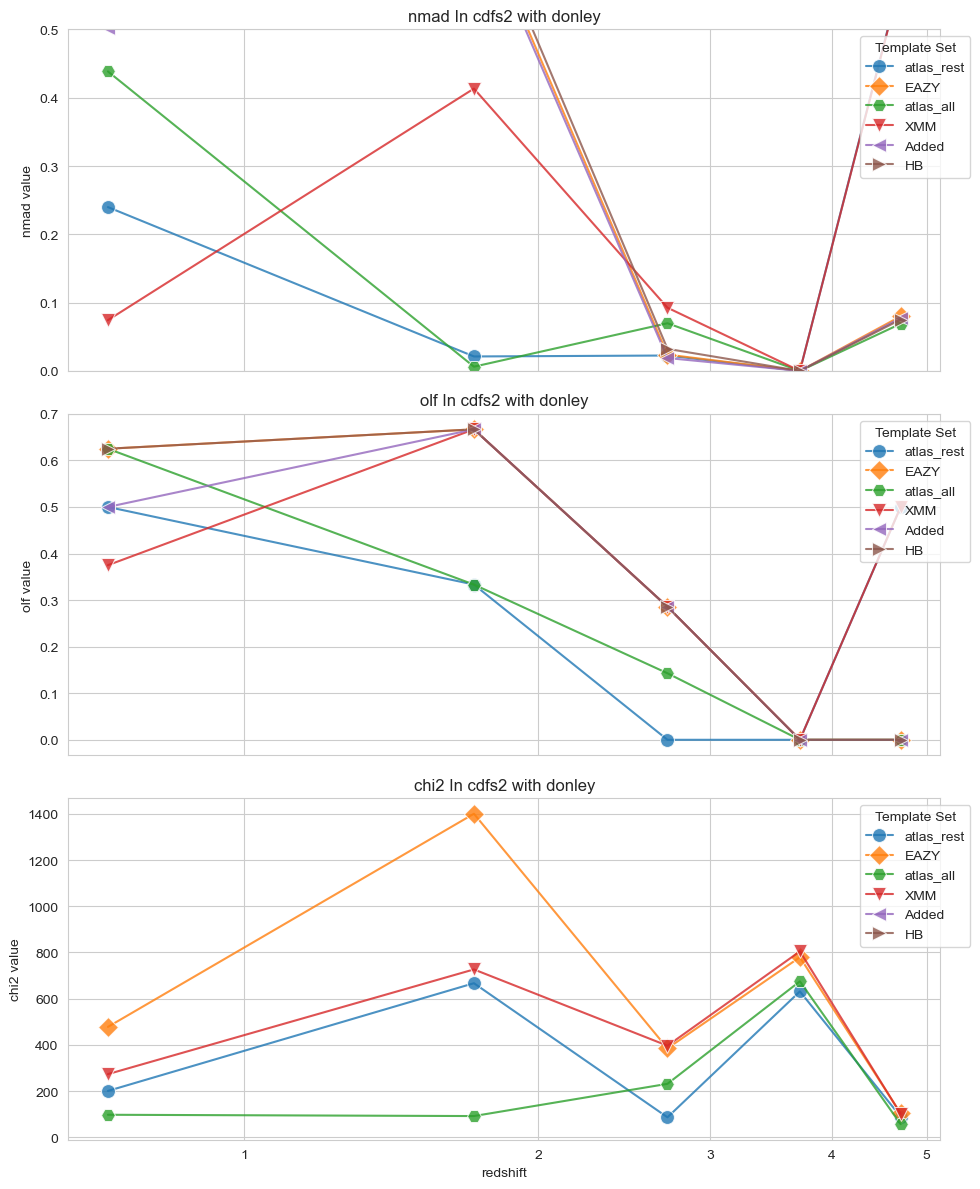

In [359]:
# Create the Plot
import matplotlib.ticker as ticker

if check_id_key == 'all':
    measurements = all_binned_keys_dict['normal']['data']['measurement'].unique() # requires a test to be normal unfortunately, change accordingly
else:
    measurements = all_binned_keys_dict[check_id_key]['data']['measurement'].unique()

markers = ['o', 'D', 'H', 'v', '<', '>', 'p', 'P', '*', 'X', 'd', '1', '2', '3', '4', '8', '^', 'h', '+', 'x', '|', '_']

# Create a subplot for each measurement
fig, axes = plt.subplots(nrows=len(measurements), ncols=1, figsize=(10, 12), sharex=True)

for ax, measurement in zip(axes, measurements):
    for idi, all_test_in_id_key_index in enumerate(test_index_sel):

        # Create a mask by checking if any element in the 'index' list matches any element in 'id_key_index'
        mask = test_index['index'].apply(lambda x: any(item in all_test_in_id_key_index for item in x))
        current_id_key = test_index[mask]['id_key'].iloc[0]

        # Load the data from the key
        final_plot_key = plotting_dict[current_id_key]['data']
        # Filter the data for the current measurement
        df_measurement = final_plot_key[final_plot_key['measurement'] == measurement]

        # Plot the data
        for idx, template_set in enumerate(all_template_sets):
            df_template_set = df_measurement[df_measurement['index'] == template_set]
            sns.lineplot(data=df_template_set, x='redshift', y='value', marker=markers[idx], markersize=10, ax=ax, label=template_set, alpha=0.8)


    # Set the title and labels
    ax.set_title(f'{measurement} In {check_field} with {check_id_key}')
    ax.set_ylabel(f'{measurement} value')
    ax.legend(title='Template Set', bbox_to_anchor=(0.9, 1), loc='upper left')

axes[0].set_ylim(0, 0.5) # If above, don't care

for ax in axes:
    ax.set_xscale('log')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
    # Custom tick formatter to display normal (linear) values
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

    ax.grid(True, which='both', axis='x', linestyle='-')
    ax.minorticks_off()

fig.tight_layout()

In [360]:
# now with agn fraction
# first, we need to sort the data by AGN fraction
test_stat_agn.sort_values(by='bayes.agn.fracAGN', inplace=True)
test_stat_agn = test_stat_agn.dropna(subset=['bayes.agn.fracAGN'])
test_stat_agn.reset_index(drop=True, inplace=True)

test_stat_agn

,id_key,id,true_id,zspec,bayes.agn.fracAGN,magnitude,zphot - atlas_rest,chi2 - atlas_rest,zphot - EAZY,chi2 - EAZY,zphot - atlas_all,chi2 - atlas_all,zphot - XMM,chi2 - XMM,zphot - Added,chi2 - Added,zphot - HB,chi2 - HB
0,donley,349,25087,2.7260,0.001021,NaN,2.705805,515.393860,2.813148,1115.825317,2.701111,356.782715,2.677608,660.721985,2.706149,NaN,2.742786,NaN
1,donley,326,23428,1.6130,0.013547,NaN,1.629203,1396.363525,2.927512,1450.936646,2.567091,1064.306030,3.001077,1381.964600,2.965467,NaN,2.962083,NaN
2,donley,220,16068,0.5440,0.013775,NaN,0.613736,303.507568,0.085445,862.670349,0.591020,135.978378,0.628460,372.431976,0.607666,NaN,0.113148,NaN
3,donley,393,28087,0.6680,0.016027,NaN,0.659258,87.086395,0.662725,426.589447,0.659426,34.879597,0.667025,66.936523,0.665313,NaN,0.664750,NaN
4,donley,4,1338,4.7591,0.038747,NaN,4.867671,135.377197,4.863632,161.942520,4.798148,75.086075,4.860571,150.894928,4.859633,NaN,4.822758,NaN
5,donley,402,28903,0.7340,0.045438,NaN,0.792393,399.597595,2.700488,529.045349,2.733266,265.632599,0.779270,749.388855,2.725356,NaN,2.799283,NaN
6,donley,264,19451,3.1878,0.053365,NaN,3.618463,84.743614,3.687614,127.768471,3.429242,43.664761,3.600715,145.032440,3.622292,NaN,3.646279,NaN
7,donley,84,6920,0.7380,0.068790,NaN,3.597445,97.854034,3.567945,119.936325,3.554270,51.339256,3.674896,102.167892,3.711231,NaN,3.738731,NaN
8,donley,186,13085,2.5820,0.093713,26.713844,2.508167,60.501648,2.586532,351.849060,2.533036,50.114124,2.755338,299.991028,2.563232,NaN,2.520097,NaN
9,donley,130,9331,3.7000,0.105962,NaN,3.694314,631.407593,3.601470,779.530518,3.686350,675.051270,3.563792,804.730957,3.625513,NaN,3.588279,NaN


In [361]:
# against agn fraction

all_binned_keys_dict = {}
no_of_bins = 5 # no. of bins

for all_test_in_id_key_index in test_index_sel:

    # Create a mask by checking if any element in the 'index' list matches any element in 'id_key_index'
    mask = test_index['index'].apply(lambda x: any(item in all_test_in_id_key_index for item in x))
    current_id_key = test_index[mask]['id_key'].iloc[0]

    binned_test_stat = test_stat_agn[test_stat_agn['id_key'] == current_id_key]

    counts_agn, bins_agn = np.histogram(test_stat_agn['bayes.agn.fracAGN'], bins=no_of_bins)
    bin_centers_agn = (np.array(bins_agn[:-1]) + np.array(bins_agn[1:])) / 2

    all_binned_df = pd.DataFrame()

    for no, index in enumerate(all_test_in_id_key_index):

        template_set = all_test_data['template_key'][index]

        last_val = 0 # last val is the first value within a bin, while new val is the last
        nmad_agn_val = [template_set, 'nmad']
        outlier_frac_agn = [template_set, 'olf']
        chi2_agn = [template_set, 'chi2']

        single_zphot = binned_test_stat[f'zphot - {template_set}']
        single_zspec = binned_test_stat['zspec'] # is the ame for each test, just helps with readability
        single_chi2 = binned_test_stat[f'chi2 - {template_set}']

        for bin_loop in range(no_of_bins):
            new_val = last_val + counts_agn[bin_loop]
            zspec_val = single_zspec[last_val:new_val]
            zphot_val = single_zphot[last_val:new_val]
            zphot_val.where(zphot_val > 0, np.nan, inplace=True)
            nmad_all, nmad_out, out_count, out_frac = gs.nmad_calc(zphot_val, zspec_val, outlier=True)
            nmad_agn_val.append(nmad_all)
            outlier_frac_agn.append(out_frac)
            chi2_med = np.median(single_chi2[last_val:new_val]) # chi2
            chi2_agn.append(chi2_med)
            last_val = new_val # adding 1 to skip the last value of the previous bin

        df_add = pd.DataFrame([nmad_agn_val, outlier_frac_agn, chi2_agn])
        all_binned_df = pd.concat([all_binned_df, df_add], axis=0)

    all_binned_df.reset_index(drop=True, inplace=True)
    all_bin_headers = np.linspace(1, no_of_bins, no_of_bins, dtype=str)
    all_binned_df.columns = ['index', 'measurement', *all_bin_headers]
    all_binned_keys_dict[current_id_key] = {'data':all_binned_df, 'bin_centers':bin_centers_agn}

In [362]:
# converting the format to be able to plot
# to make it less confusing i will be using a dictionary to store these.
plotting_dict = {}
for all_test_in_id_key_index in test_index_sel:

    # Create a mask by checking if any element in the 'index' list matches any element in 'id_key_index'
    mask = test_index['index'].apply(lambda x: any(item in all_test_in_id_key_index for item in x))
    current_id_key = test_index[mask]['id_key'].iloc[0]

    # filtering all_binned_keys_df
    binned_plotting_premelt = all_binned_keys_dict[current_id_key]['data']
    bin_centers_agn = all_binned_keys_dict[current_id_key]['bin_centers']

    all_binned_df_copy = pd.melt(binned_plotting_premelt, id_vars=['index', 'measurement'], var_name='value_type', value_name='value')
    all_binned_df_copy.reset_index(inplace=True)
    all_binned_df_copy['agn_fraction'] = [bin_centers_agn[int(x.split('.')[0]) - 1] for x in all_binned_df_copy['value_type']]

    plotting_dict[current_id_key] = {'data':all_binned_df_copy}

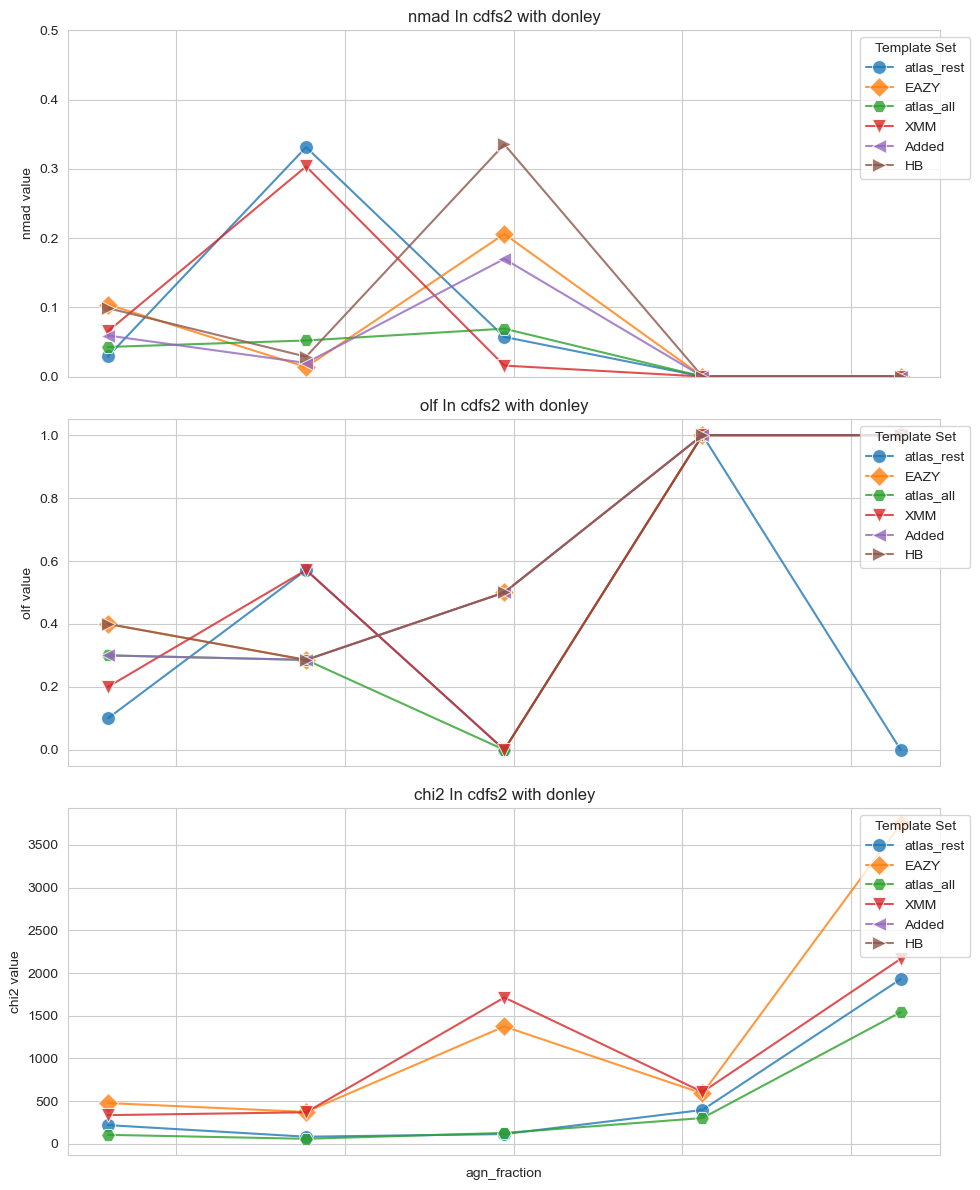

In [363]:
# Create the Plot
import matplotlib.ticker as ticker

if check_id_key == 'all':
    measurements = all_binned_keys_dict['normal']['data']['measurement'].unique() # requires a test to be normal unfortunately, change accordingly
else:
    measurements = all_binned_keys_dict[check_id_key]['data']['measurement'].unique()

markers = ['o', 'D', 'H', 'v', '<', '>', 'p', 'P', '*', 'X', 'd', '1', '2', '3', '4', '8', '^', 'h', '+', 'x', '|', '_']

# Create a subplot for each measurement
fig, axes = plt.subplots(nrows=len(measurements), ncols=1, figsize=(10, 12), sharex=True)

for ax, measurement in zip(axes, measurements):
    for idi, all_test_in_id_key_index in enumerate(test_index_sel):

        # Create a mask by checking if any element in the 'index' list matches any element in 'id_key_index'
        mask = test_index['index'].apply(lambda x: any(item in all_test_in_id_key_index for item in x))
        current_id_key = test_index[mask]['id_key'].iloc[0]

        # Load the data from the key
        final_plot_key = plotting_dict[current_id_key]['data']
        # Filter the data for the current measurement
        df_measurement = final_plot_key[final_plot_key['measurement'] == measurement]

        # Plot the data
        for idx, template_set in enumerate(all_template_sets):
            df_template_set = df_measurement[df_measurement['index'] == template_set]
            sns.lineplot(data=df_template_set, x='agn_fraction', y='value', marker=markers[idx], markersize=10, ax=ax, label=template_set, alpha=0.8)


    # Set the title and labels
    ax.set_title(f'{measurement} In {check_field} with {check_id_key}')
    ax.set_ylabel(f'{measurement} value')
    ax.legend(title='Template Set', bbox_to_anchor=(0.9, 1), loc='upper left')

axes[0].set_ylim(0, 0.5) # If above, don't care

for ax in axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

    ax.grid(True, which='both', axis='x', linestyle='-')

fig.tight_layout()

In [281]:
# now with magnitude (band is set earlier)
# first, we need to sort the data by mag
test_stat_mag.sort_values(by='magnitude', inplace=True)
test_stat_mag = test_stat_mag.dropna(subset=['magnitude'])
test_stat_mag.reset_index(drop=True, inplace=True)

test_stat_mag

,id_key,id,true_id,zspec,bayes.agn.fracAGN,magnitude,zphot - atlas_rest,chi2 - atlas_rest,zphot - EAZY,chi2 - EAZY,zphot - atlas_all,chi2 - atlas_all,zphot - XMM,chi2 - XMM,zphot - Added,chi2 - Added,zphot - HB,chi2 - HB
0,lacy_no_ovlp,262,9940,2.0980,0.203314,15.850719,1.941179,27.848671,1.942675,29.455402,1.909376,26.937510,2.894219,73.556541,2.221304,NaN,2.014373,NaN
1,lacy_no_ovlp,438,16812,0.9430,0.538031,16.523024,4.328235,510.203552,4.312957,634.069763,4.326999,456.866486,4.304876,438.724182,4.320699,NaN,4.271289,NaN
2,lacy_no_ovlp,284,10474,2.0774,0.411004,17.690865,2.722565,715.363770,2.769326,1036.002686,2.007883,494.064392,2.091652,849.427856,2.692399,NaN,2.678540,NaN
3,lacy_no_ovlp,323,11747,0.5340,0.527351,19.066045,0.490543,54.671288,0.496492,95.746727,0.376194,248.840866,0.481149,304.245636,0.476851,NaN,0.470453,NaN
4,lacy_no_ovlp,254,9767,0.4260,0.005421,19.513152,0.411635,86.005325,0.443324,197.046051,0.422933,27.020769,0.428197,105.583794,0.435362,NaN,0.435063,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,lacy_no_ovlp,364,13493,0.9430,0.326617,23.853034,0.920812,25.705120,0.931964,29.977493,0.898374,19.686075,0.919181,58.664799,0.922146,NaN,0.933881,NaN
123,lacy_no_ovlp,190,6717,0.8690,0.114606,23.978130,0.788931,123.498734,0.822378,180.396713,0.851011,79.865921,0.888417,153.938232,0.845797,NaN,0.845257,NaN
124,lacy_no_ovlp,283,10457,2.2470,0.002851,24.230333,1.756670,26.212711,1.802441,26.813612,3.813914,29.813730,3.055336,106.775185,2.916682,NaN,3.088723,NaN
125,lacy_no_ovlp,311,11295,1.2535,0.111963,25.003069,1.240768,139.674561,1.261647,282.616638,1.239872,59.573193,1.224702,165.576141,1.253520,NaN,1.250725,NaN


In [282]:
# against magnitude

all_binned_keys_dict = {}
no_of_bins = 10 # no. of bins

for all_test_in_id_key_index in test_index_sel:

    # Create a mask by checking if any element in the 'index' list matches any element in 'id_key_index'
    mask = test_index['index'].apply(lambda x: any(item in all_test_in_id_key_index for item in x))
    current_id_key = test_index[mask]['id_key'].iloc[0]

    binned_test_stat = test_stat_mag[test_stat_mag['id_key'] == current_id_key]

    counts_agn, bins_mag = np.histogram(test_stat_mag['magnitude'], bins=no_of_bins)
    bin_centers_mag = (np.array(bins_mag[:-1]) + np.array(bins_mag[1:])) / 2

    all_binned_df = pd.DataFrame()

    for no, index in enumerate(all_test_in_id_key_index):

        template_set = all_test_data['template_key'][index]

        last_val = 0 # last val is the first value within a bin, while new val is the last
        nmad_mag_val = [template_set, 'nmad']
        outlier_frac_mag = [template_set, 'olf']
        chi2_mag = [template_set, 'chi2']

        single_zphot = binned_test_stat[f'zphot - {template_set}']
        single_zspec = binned_test_stat['zspec'] # is the ame for each test, just helps with readability
        single_chi2 = binned_test_stat[f'chi2 - {template_set}']

        for bin_loop in range(no_of_bins):
            new_val = last_val + counts_agn[bin_loop]
            zspec_val = single_zspec[last_val:new_val]
            zphot_val = single_zphot[last_val:new_val]
            zphot_val.where(zphot_val > 0, np.nan, inplace=True)
            nmad_all, nmad_out, out_count, out_frac = gs.nmad_calc(zphot_val, zspec_val, outlier=True)
            nmad_mag_val.append(nmad_all)
            outlier_frac_mag.append(out_frac)
            chi2_med = np.median(single_chi2[last_val:new_val]) # chi2
            chi2_mag.append(chi2_med)
            last_val = new_val # adding 1 to skip the last value of the previous bin

        df_add = pd.DataFrame([nmad_mag_val, outlier_frac_mag, chi2_mag])
        all_binned_df = pd.concat([all_binned_df, df_add], axis=0)

    all_binned_df.reset_index(drop=True, inplace=True)
    all_bin_headers = np.linspace(1, no_of_bins, no_of_bins, dtype=str)
    all_binned_df.columns = ['index', 'measurement', *all_bin_headers]
    all_binned_keys_dict[current_id_key] = {'data':all_binned_df, 'bin_centers':bin_centers_mag}

C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-p

In [283]:
# converting the format to be able to plot
# to make it less confusing i will be using a dictionary to store these.
plotting_dict = {}
for all_test_in_id_key_index in test_index_sel:

    # Create a mask by checking if any element in the 'index' list matches any element in 'id_key_index'
    mask = test_index['index'].apply(lambda x: any(item in all_test_in_id_key_index for item in x))
    current_id_key = test_index[mask]['id_key'].iloc[0]

    # filtering all_binned_keys_df
    binned_plotting_premelt = all_binned_keys_dict[current_id_key]['data']
    bin_centers_mag = all_binned_keys_dict[current_id_key]['bin_centers']

    all_binned_df_copy = pd.melt(binned_plotting_premelt, id_vars=['index', 'measurement'], var_name='value_type', value_name='value')
    all_binned_df_copy.reset_index(inplace=True)
    all_binned_df_copy['magnitude'] = [bin_centers_mag[int(x.split('.')[0]) - 1] for x in all_binned_df_copy['value_type']]

    plotting_dict[current_id_key] = {'data':all_binned_df_copy}

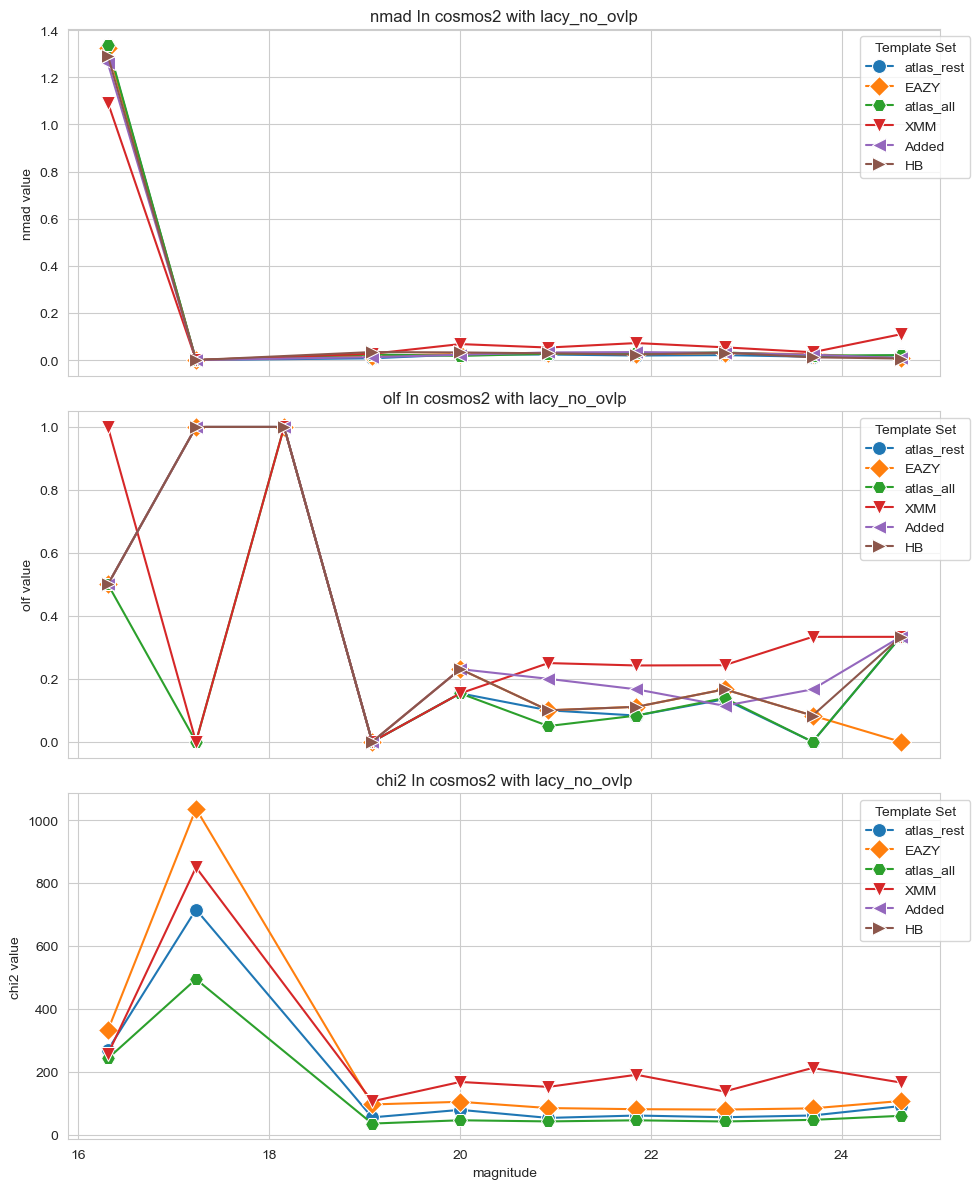

In [284]:
# Create the Plot
import matplotlib.ticker as ticker

if check_id_key == 'all':
    measurements = all_binned_keys_dict['normal']['data']['measurement'].unique() # requires a test to be normal unfortunately, change accordingly
else:
    measurements = all_binned_keys_dict[check_id_key]['data']['measurement'].unique()

markers = ['o', 'D', 'H', 'v', '<', '>', 'p', 'P', '*', 'X', 'd', '1', '2', '3', '4', '8', '^', 'h', '+', 'x', '|', '_']

# Create a subplot for each measurement
fig, axes = plt.subplots(nrows=len(measurements), ncols=1, figsize=(10, 12), sharex=True)

for ax, measurement in zip(axes, measurements):
    for idi, all_test_in_id_key_index in enumerate(test_index_sel):

        # Create a mask by checking if any element in the 'index' list matches any element in 'id_key_index'
        mask = test_index['index'].apply(lambda x: any(item in all_test_in_id_key_index for item in x))
        current_id_key = test_index[mask]['id_key'].iloc[0]

        # Load the data from the key
        final_plot_key = plotting_dict[current_id_key]['data']
        # Filter the data for the current measurement
        df_measurement = final_plot_key[final_plot_key['measurement'] == measurement]

        # Plot the data
        for idx, template_set in enumerate(all_template_sets):
            df_template_set = df_measurement[df_measurement['index'] == template_set]
            sns.lineplot(data=df_template_set, x='magnitude', y='value', marker=markers[idx], markersize=10, ax=ax, label=template_set, alpha=0.8)


    # Set the title and labels
    ax.set_title(f'{measurement} In {check_field} with {check_id_key}')
    ax.set_ylabel(f'{measurement} value')
    ax.legend(title='Template Set', bbox_to_anchor=(0.9, 1), loc='upper left')

for ax in axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

    ax.grid(True, which='both', axis='x', linestyle='-')

fig.tight_layout()

Plotting the Recommendations

In [168]:
# finding all the recommendations, then plotting their nmad, outlier fraction and others
# first, we need to find all the recommendations test runs

all_recommendation_tests = [dir for dir in glob.glob(f'{output_location}/*/recommendation_*_*_*') if 'FALSE' not in dir and 'OLD' not in dir]

print(f'Recommendation Tests: {len(all_recommendation_tests)}')
all_recommendation_tests

Recommendation Tests: 11


['G:/honours/outputs\\cdfs2\\recommendation_added_cdfs2_donley',
 'G:/honours/outputs\\cdfs2\\recommendation_added_cdfs2_lacy_no_ovlp',
 'G:/honours/outputs\\cdfs2\\recommendation_added_cdfs2_normal',
 'G:/honours/outputs\\cdfs2\\recommendation_added_cdfs2_xray_agn_no_ovlp',
 'G:/honours/outputs\\cosmos2\\recommendation_added_cosmos2_donley',
 'G:/honours/outputs\\cosmos2\\recommendation_added_cosmos2_lacy_no_ovlp',
 'G:/honours/outputs\\cosmos2\\recommendation_added_cosmos2_normal',
 'G:/honours/outputs\\cosmos2\\recommendation_added_cosmos2_xray_agn_no_ovlp',
 'G:/honours/outputs\\uds\\recommendation_added_uds_donley',
 'G:/honours/outputs\\uds\\recommendation_added_uds_lacy_no_ovlp',
 'G:/honours/outputs\\uds\\recommendation_added_uds_normal']

In [169]:
recommendation_df = pd.DataFrame(columns=['field', 'id_key', 'method', 'no_of_templates',  'nmad', 'outlier_scatter', 'outlier_fraction', 'bias', 'mean_CRPS'])

for recommendation_test in all_recommendation_tests:
    # get the field and id_key
    field = recommendation_test.split('\\')[2].split('_')[2]
    id_key_list = recommendation_test.split('/')[-1].split('_')[3::]
    id_key = '_'.join(id_key_list)

    # get the method
    method = recommendation_test.split('\\')[-1].split('_')[1]

    # get the recommendation csv
    recommendation_csv_file = glob.glob(f'{recommendation_test}/*.csv')
    recommendation_csv = pd.read_csv(recommendation_csv_file[0]) # should only be one csv file in the dir


    # get the values for no agn templates
    test_test = 'no_templates_standard_fit' # what test are these stored in
    no_temp_df_file = glob.glob(f'{output_location}/{field}/{test_test}/*.csv')
    no_temp_df = pd.read_csv(no_temp_df_file[0])
    recommendation_test_params = recommendation_csv.iloc[0]
    no_temp_df = no_temp_df[(no_temp_df['id_key'] == id_key) &
                            (no_temp_df['template_key'] == recommendation_test_params['template_key']) &
                            (no_temp_df['zstep'] == recommendation_test_params['zstep'])] # making sure the parameters match up

    data_list = pd.DataFrame({'field':field,
                              'id_key':id_key,
                              'method':method,
                              'no_of_templates':0,
                              'nmad':no_temp_df['nmad_val'],
                              'outlier_scatter':no_temp_df['outlier_scatter'],
                              'outlier_fraction':no_temp_df['outlier_fraction'],
                              'bias':no_temp_df['bias'],
                              'mean_CRPS':no_temp_df['mean CRPS']})

    recommendation_df = pd.concat([recommendation_df, data_list], axis=0)


    # iterate through the recommendation csv

    for index, row in recommendation_csv.iterrows():
        # get the values
        nmad = row['nmad_val']
        no_of_templates = len(gs.stringlist_to_list(row['agn_templates']))
        outlier_scatter = row['outlier_scatter']
        outlier_fraction = row['outlier_fraction']
        bias = row['bias']
        mean_CRPS = row['mean CRPS']

        # add to the df
        data_list = pd.DataFrame({'field':field,
                                  'id_key':id_key,
                                  'method':method,
                                  'no_of_templates':no_of_templates,
                                  'nmad':nmad,
                                  'outlier_scatter':outlier_scatter,
                                  'outlier_fraction':outlier_fraction,
                                  'bias':bias,
                                  'mean_CRPS': mean_CRPS}, index=[0])

        recommendation_df = pd.concat([recommendation_df, data_list], axis=0)

recommendation_df.reset_index(drop=True, inplace=True)
recommendation_df

C:\Users\eddie\AppData\Local\Temp\ipykernel_12976\205794386.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  recommendation_df = pd.concat([recommendation_df, data_list], axis=0)


,field,id_key,method,no_of_templates,nmad,outlier_scatter,outlier_fraction,bias,mean_CRPS
0,cdfs2,donley,added,0,0.147171,0.046142,0.428571,0.030728,0.669856
1,cdfs2,donley,added,1,0.041995,0.039926,0.285714,0.036019,0.534029
2,cdfs2,donley,added,2,0.080133,0.040774,0.380952,-0.010593,0.553993
3,cdfs2,donley,added,3,0.029744,0.038747,0.285714,-0.005686,0.486957
4,cdfs2,donley,added,4,0.034229,0.036988,0.333333,-0.006330,0.582270
...,...,...,...,...,...,...,...,...,...
116,uds,normal,added,6,0.014479,0.020248,0.046358,-0.020670,0.108473
117,uds,normal,added,7,0.014366,0.020286,0.046358,-0.020685,0.108517
118,uds,normal,added,8,0.014505,0.020224,0.046358,-0.020485,0.108471
119,uds,normal,added,9,0.014565,0.020380,0.052980,-0.020387,0.109601


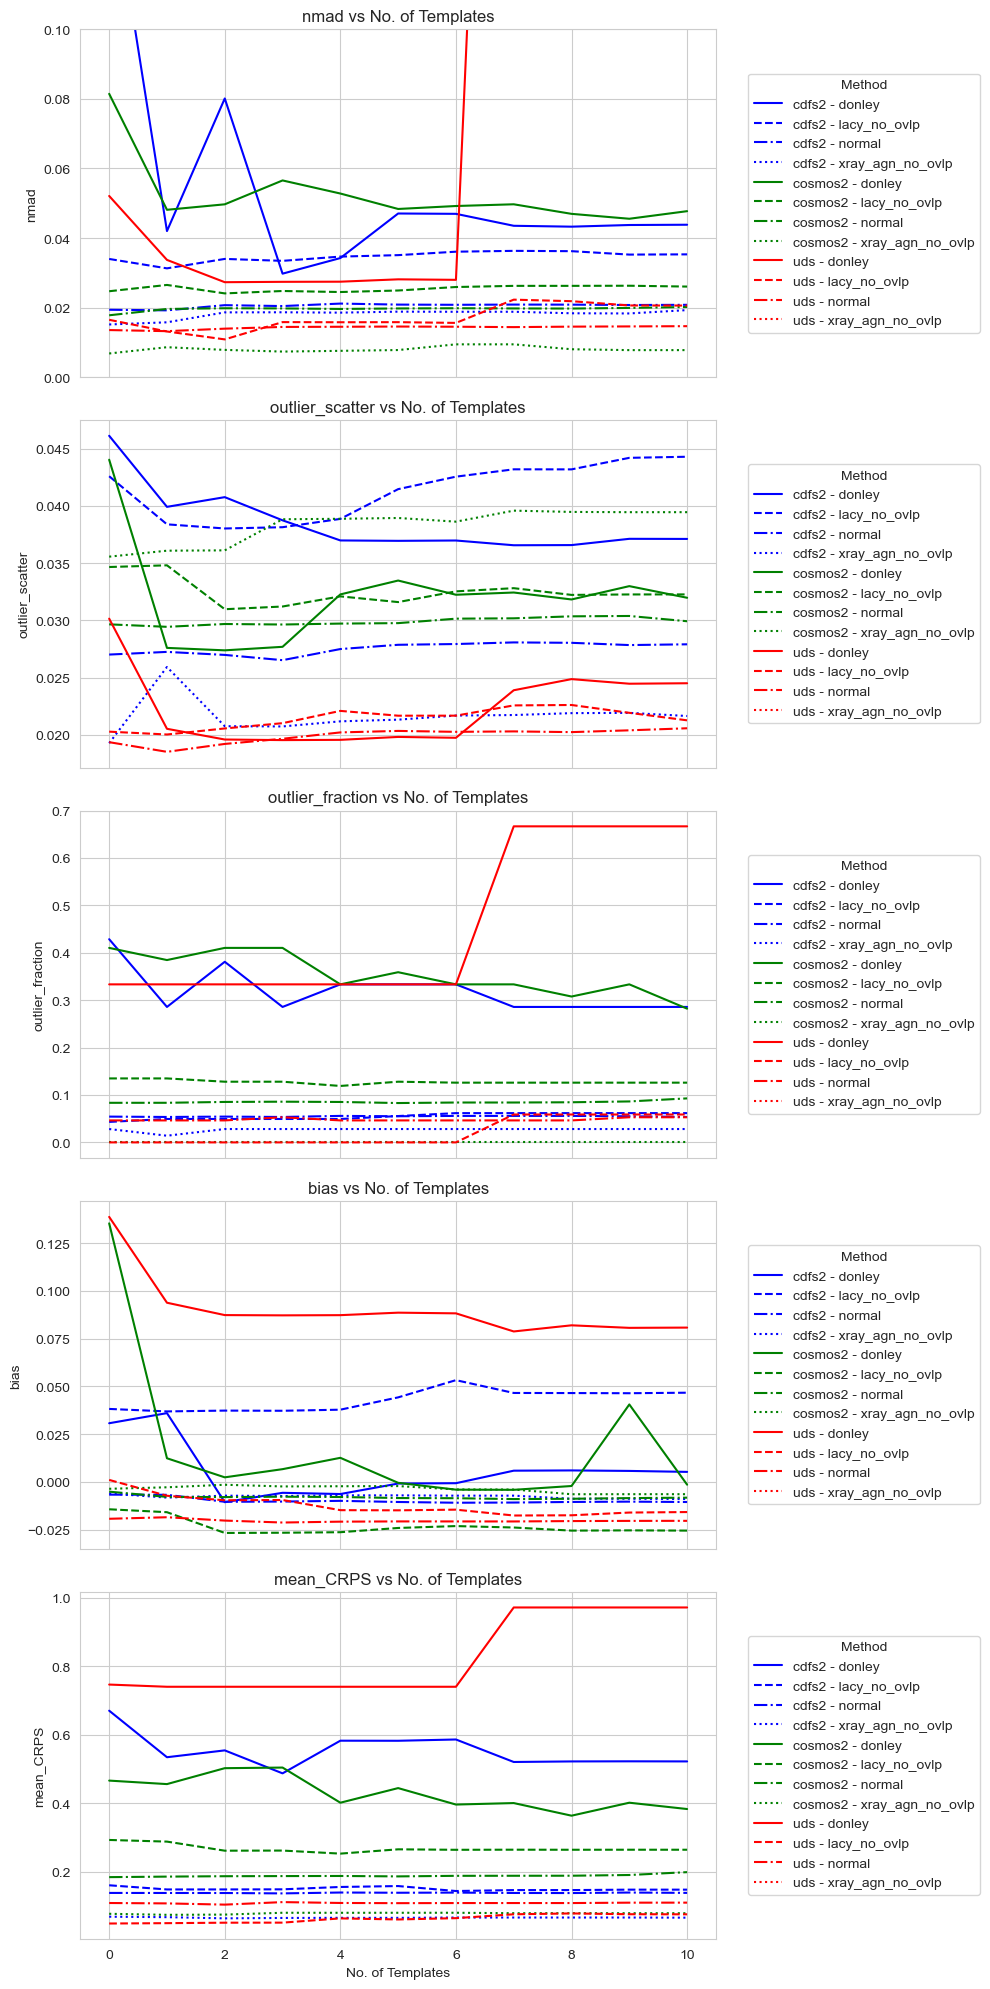

In [170]:
# now plotting for each measurement
method = 'added'
no_of_plots = recommendation_df.shape[1] - 4 # no. of measurements
recommendation_plot_df = recommendation_df[recommendation_df['method'] == method]

linestyles = ['-', '--', '-.', ':']
linecolours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig, ax = plt.subplots(nrows=no_of_plots, ncols=1, figsize=(10, 20), sharex=True)

for no in range(no_of_plots):

    axa = ax[no]

    measurement = recommendation_df.columns[4 + no]

    for idi, field in enumerate(recommendation_df['field'].unique()):
        for ido, id_key in enumerate(recommendation_df['id_key'].unique()):
            method_df = recommendation_df[(recommendation_df['field'] == field) & (recommendation_df['id_key'] == id_key)]
            method_df = method_df[method_df['method'] == method]
            method_df = method_df.sort_values(by='no_of_templates')

            axa.plot(method_df['no_of_templates'], method_df[measurement], label=f'{field} - {id_key}', linestyle=linestyles[ido], color=linecolours[idi])

    axa.set_title(f'{measurement} vs No. of Templates')

    if no == no_of_plots - 1:
        axa.set_xlabel('No. of Templates')

    axa.set_ylabel(measurement)
    axa.legend(title='Method', bbox_to_anchor=(1.04, 0.5), loc='center left')

    if measurement == 'nmad':
        axa.set_ylim(0, 0.1)

    fig.tight_layout()

In [180]:
# in each test, which has the best nmad, outlier fraction, bias, and outlier scatter

best_no_of_templates = pd.DataFrame(columns=['field', 'id_key', 'method', 'best_no_of_templates', 'templates'])
recommendation_all_csv = pd.read_csv(f'{output_location}/other_data/recommendation_list.csv')

for field in recommendation_df['field'].unique():
    for id_key in recommendation_df['id_key'].unique():
        for method in recommendation_df['method'].unique():
            field_id_key_df = recommendation_df[(recommendation_df['field'] == field) & (recommendation_df['id_key'] == id_key) & (recommendation_df['method'] == method)]

            if field_id_key_df.empty:
                continue

            best_nmad = field_id_key_df[field_id_key_df['nmad'] == field_id_key_df['nmad'].min()]
            best_outlier_fraction = field_id_key_df[field_id_key_df['outlier_fraction'] == field_id_key_df['outlier_fraction'].min()]
            best_bias = field_id_key_df[field_id_key_df['bias'] == field_id_key_df['bias'].min()]
            best_outlier_scatter = field_id_key_df[field_id_key_df['outlier_scatter'] == field_id_key_df['outlier_scatter'].min()]

            # following the philosophy to get the recommendations, i'll just add the normalisations to get the best no. of templates
            best_template_score = gs.normalizer(field_id_key_df['nmad']) + \
                                  gs.normalizer(field_id_key_df['outlier_fraction']) +\
                                  gs.normalizer(field_id_key_df['mean_CRPS'])
            best_template_score.reset_index(drop=True, inplace=True)

            recommendation_list = recommendation_all_csv[(recommendation_all_csv['field'] == field) & (recommendation_all_csv['id_key'] == id_key) & (recommendation_all_csv['method'] == method)]['recommendation'].iloc[0]
            recommendation_list = gs.stringlist_to_list(recommendation_list)

            templates_recommendation = field_id_key_df['no_of_templates']
            data_list = pd.DataFrame({'field':field,
                                      'id_key':id_key,
                                      'method':method,
                                      'best_no_of_templates': best_template_score.idxmin(),
                                      'templates': [recommendation_list[0:best_template_score.idxmin()]]}, index=[0])

            best_no_of_templates = pd.concat([best_no_of_templates, data_list], axis=0)

best_no_of_templates.reset_index(drop=True, inplace=True)
best_no_of_templates.to_csv(f'{output_location}/other_data/recommendation_best-no-of-templates.csv', index=False)
best_no_of_templates

,field,id_key,method,best_no_of_templates,templates
0,cdfs2,donley,added,3,"[13, 7, 5]"
1,cdfs2,lacy_no_ovlp,added,1,[27]
2,cdfs2,normal,added,1,[29]
3,cdfs2,xray_agn_no_ovlp,added,1,[29]
4,cosmos2,donley,added,10,"[7, 10, 14, 9, 35, 5, 21, 27, 2, 1]"
5,cosmos2,lacy_no_ovlp,added,4,"[27, 10, 30, 9]"
6,cosmos2,normal,added,0,[]
7,cosmos2,xray_agn_no_ovlp,added,0,[]
8,uds,donley,added,2,"[11, 26]"
9,uds,lacy_no_ovlp,added,2,"[11, 38]"
